In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression ,  ElasticNet , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import svm
import seaborn as sns

<h3> read in the data </h3>

In [121]:
data = pd.read_csv('/Users/chrismembrey/Desktop/GA/DSI16-lessons/project/project-capstone/Movies/Final_Movies/cleaning_eda/EDA_complete-Copy1.csv', lineterminator = '\n')

In [122]:
data.head()

,Unnamed: 0,tmdb_id,imdb_id,title,revenue,budget,genres,release_date,runtime,tmdb_vote_average,...,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne,original_language_bins,profit?,from_collection,blurb_objectivity,blurb_polarity
0,0,8095.0,tt0056937,Cleopatra,71000000,44000000.0,"['Drama', 'History', 'Romance']",1963-06-12,248.0,7.0,...,NaN,NaN,NaN,NaN,NaN,English,1,0,0.903075,0.000992
1,1,20367.0,tt0037638,Detour,16172,30000.0,"['Crime', 'Drama']",1945-11-30,67.0,7.2,...,NaN,NaN,NaN,NaN,NaN,English,0,0,0.898970,0.012065
2,2,11620.0,tt0043949,Quo Vadis,101486,7623000.0,"['Drama', 'History', 'Romance']",1951-11-08,171.0,7.0,...,NaN,NaN,NaN,NaN,NaN,English,0,0,0.814066,-0.071299
3,3,10865.0,tt0230011,Atlantis: The Lost Empire,186053725,120000000.0,"['Animation', 'Family', 'Adventure', 'Science ...",2001-06-02,95.0,6.9,...,NaN,NaN,NaN,NaN,NaN,English,1,1,0.925194,0.005663
4,4,11313.0,tt0252501,Hearts in Atlantis,24185781,31000000.0,"['Drama', 'Mystery']",2001-09-07,101.0,6.5,...,NaN,NaN,NaN,NaN,NaN,English,0,0,0.836830,-0.043080


<h3> check the variables </h3>

In [123]:
data[[x for x in data.columns if ('Director' not in x) and ('ACTOR' not in x) 
      and ('COMPOSER' not in x) and ('BLURB' not in x) and ('GENRE' not in x)]].columns

Index(['Unnamed: 0', 'tmdb_id', 'imdb_id', 'title', 'revenue', 'budget',
       'genres', 'release_date', 'runtime', 'tmdb_vote_average',
       'tmdb_vote_count', 'spoken_languages', 'production_countries', 'blurb',
       'actors', 'directors', 'composer', 'ROI', 'month', 'day', 'year',
       'inf_budget', 'blurb_length', 'genre_pair_unique', 'Unnamed: 13307',
       'nan', 'original_language_bins', 'profit?', 'from_collection',
       'blurb_objectivity', 'blurb_polarity'],
      dtype='object')

In [124]:
#initial columns is best as the df is too big
data.columns[:30]

Index(['Unnamed: 0', 'tmdb_id', 'imdb_id', 'title', 'revenue', 'budget',
       'genres', 'release_date', 'runtime', 'tmdb_vote_average',
       'tmdb_vote_count', 'spoken_languages', 'production_countries', 'blurb',
       'actors', 'directors', 'composer', 'ROI', 'month', 'day', 'year',
       'inf_budget', 'blurb_length', 'GENRE_Drama', 'GENRE_History',
       'GENRE_Romance', 'GENRE_Crime', 'GENRE_Animation', 'GENRE_Family',
       'GENRE_Adventure'],
      dtype='object')

In [125]:
#check the shape to see if the count of variables is the same as the cleaning page
data.shape

(9537, 22035)

<h3> Some null values still require changing </h3> (espacially for dummified columns)

In [126]:
data[[x for x in data.columns if 'Director' in x]] = data[[x for x in data.columns if 'Director' in x]].replace(np.nan,0)

In [127]:
data[[x for x in data.columns if 'Director' in x]]

,Director_Joseph L. Mankiewicz,Director_Edgar G. Ulmer,Director_Scott R. Beal,Director_Kenneth W. Richardson,Director_Gary Trousdale,Director_Kirk Wise,Director_Scott Hicks,Director_Robert J. Fraser,Director_Mark Rosman,Director_Darrin Brown,...,Director_Owen Egerton,Director_Salvador Simó,Director_Gene Stupnitsky,Director_Ben Hernandez Bray,Director_Marcelo Martinessi,Director_Alex Kendrick,Director_Diego Kaplan,Director_Martin J Pickering,Director_Makoto Shinkai,Director_Rémi St-Michel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
data[[x for x in data.columns if 'COMPOSER' in x]] = data[[x for x in data.columns if 'COMPOSER' in x]].replace(np.nan,0)

In [129]:
data[[x for x in data.columns if 'COMPOSER' in x]]

,COMPOSER_Alex North,COMPOSER_Leo Erdody,COMPOSER_Miklós Rózsa,COMPOSER_James Newton Howard,COMPOSER_Mychael Danna,COMPOSER_Patrick Doyle,COMPOSER_Christophe Beck,COMPOSER_Thomas Newman,COMPOSER_Trevor Jones,COMPOSER_Danny Elfman,...,COMPOSER_Tyler Stone,COMPOSER_Marcos Cruz Lloréns,COMPOSER_Marco Fedalto,COMPOSER_Arturo Cardelús,COMPOSER_Matt Novack,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
data[[x for x in data.columns if 'ACTOR' in x]] = data[[x for x in data.columns if 'ACTOR' in x]].replace(np.nan,0)

In [131]:
data[[x for x in data.columns if 'ACTOR' in x]] 

,ACTOR_Elizabeth Taylor,ACTOR_Richard Burton,ACTOR_Rex Harrison,ACTOR_Pamela Brown,ACTOR_Hume Cronyn,ACTOR_Andrew Keir,ACTOR_Martin Landau,ACTOR_Roddy McDowall,ACTOR_Robert Stephens,ACTOR_Francesca Annis,...,ACTOR_Samantha Langevin,ACTOR_Cliff De Young,ACTOR_Tommy Tiny Lister,ACTOR_Peter Berg,ACTOR_Fred Thompson,ACTOR_Kenneth Branagh,ACTOR_Hallie Eisenberg,ACTOR_Jay Rodan,ACTOR_Kareena Kapoor,ACTOR_Eriq Ebouaney
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


runtime null values will become the median

In [132]:
data.rutime = data.runtime.replace(np.nan,np.median(data.runtime[data.runtime.isnull() == False]))

<ipython-input-132-231b19938ae6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.rutime = data.runtime.replace(np.nan,np.median(data.runtime[data.runtime.isnull() == False]))


blurb length will become the median

In [133]:
data.blurb_length = data.blurb_length.replace(np.nan,np.median(data.blurb_length[data.blurb_length.isnull() == False]))

runtime will become the median

In [134]:
data['runtime'] = data.runtime.replace(np.nan,data.runtime[data.runtime.isnull() == False].median())

Now there are no nulls in the dataset

In [135]:
data.isnull().sum().to_frame()[data.isnull().sum().to_frame().iloc[:,0] > 0]

,0
tmdb_id,1546
imdb_id,28
genres,23
spoken_languages,41
production_countries,125
blurb,24
actors,18
composer,605
Unnamed: 13307,9294
nan,9534


These are the columns that are left with null values, but they will be removed from the dataframe as they have been made into categories or no longer serve a purpose. 

<h3> Variables that will be used to look at ROI </h3>

reiteration of the variables that are being used

In [136]:
data.drop(['Unnamed: 0', 'tmdb_id', 'imdb_id', 'title', 'revenue', 'budget',
       'genres', 'release_date','tmdb_vote_average',
       'tmdb_vote_count', 'spoken_languages', 'production_countries', 'blurb',
       'actors', 'directors', 'composer', 'year', 'profit?','Unnamed: 13307',
       'nan'], axis = 1, inplace = True)

<h3> look at the dataframe </h3>

In [18]:
data.head()

,runtime,ROI,month,day,inf_budget,blurb_length,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,...,COMPOSER_Matt Novack,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne,original_language_bins,from_collection,blurb_objectivity,blurb_polarity
0,248.0,61.363636,6.0,Wednesday,3.781901e+08,37.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.903075,0.000992
1,67.0,-46.093333,11.0,Friday,4.359348e+05,56.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.898970,0.012065
2,171.0,-98.668687,11.0,Thursday,7.594529e+07,68.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.814066,-0.071299
3,95.0,55.044771,6.0,Saturday,1.773128e+08,52.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,1,0.925194,0.005663
4,101.0,-21.981352,9.0,Friday,4.572874e+07,14.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.836830,-0.043080


In [19]:
data.shape

(9537, 22015)

In [20]:
df = data.copy()

In [22]:
y = df.pop('ROI')

In [23]:
X = df

In [24]:
X.shape

(9537, 22014)

<b> Baseline for the target variable </b>

In [25]:
y.mean()

159.06216757958848

<h1>Preprocessing</h1>

<b> dummies for day, month , original_language_bins </b>

I'm not going to drop any of the features since the project is based on trying to find the coefficients with the highest value and we need to see every categories contribution.

In [26]:
X = pd.get_dummies(X, columns = ['day', 'month', 'original_language_bins'], dummy_na = True, drop_first = True)

In [27]:
X.shape

(9537, 22037)

<b>Train test split</b>

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
x_train = pd.DataFrame(x_train ,columns = X.columns)
x_test = pd.DataFrame(x_test ,columns = X.columns)

<b>Standard Scaler on the Variables that are not binary/catagorical</b>

I'm just going to scale the continuous features to be able to retain explainability of the binary variables. 

The coeffients for the binary variables will represent the increase in ROI when that film has a certain variable. For example, if Meryl Streep has a coefficient of 88, then a film containing Meryl Streep will have an expected increase in ROI of around 88%. 

For the scaled, continuous features, the coefficient values of 88% will represent a standard deviation of the feature increasing revenues by 88%.

In [30]:
scaler = StandardScaler()
scaler_columns = ['runtime', 'inf_budget', 'blurb_length','blurb_objectivity', 'blurb_polarity']

In [31]:
scale_transformer = ColumnTransformer([('scaler',scaler,scaler_columns)], remainder = 'passthrough', sparse_threshold = 0)

need to be able to get the feature names from scaling alone which you cannot do with just a standard scaler

'The function walks through the steps of the ColumnTransformer and returns the input column names when the transformer does not provide a get_feature_names() method. For pipelines, it walks through the pipeline steps and will return either the output columns of the pipeline or the input columns, if the pipeline creates no new columns.'

below is a function found from https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html
which does as described in the cell above. I will be using standard scaler on a set amount of columns and will create a dataframe using this output as the column headers.

In [31]:
import warnings
import sklearn
import pandas as pd



def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names


transform the x variables

In [33]:
x_train_trans = pd.DataFrame(scale_transformer.fit_transform(x_train), columns = get_feature_names(scale_transformer))

x_test_trans = pd.DataFrame(scale_transformer.transform(x_test), columns = get_feature_names(scale_transformer))

<ipython-input-32-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-32-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [34]:
x_train_trans

,scaler__runtime,scaler__inf_budget,scaler__blurb_length,scaler__blurb_objectivity,scaler__blurb_polarity,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,0.499954,-0.239884,0.468320,0.084534,-0.152816,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.552794,-0.462344,-1.095240,0.798717,1.564589,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.193505,-0.692674,-1.247783,1.747339,0.354826,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.323935,1.021075,-0.752020,0.407741,-1.054686,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.552794,-0.614906,-0.790155,0.640046,1.149833,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7624,1.232301,0.220783,0.086964,0.598133,0.226360,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7625,1.049214,-0.364411,-0.637613,0.336727,0.259203,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7626,0.591498,-0.540125,1.955608,0.322993,0.284676,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7627,2.971623,-0.433999,-0.828291,0.545867,-1.263210,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


NB - For this analysis I am trying to determine which features affect the ROI score and can account for variability on the ROI. For this reason I need models that can show varible coefficients or importance (in the case of a decision tree)

<h2>Linear Regression Grid Search</h2>

<b> Simple Linear Regression </b>

In [35]:
#model object
model = LinearRegression()

model.fit(x_train_trans , y_train)

LinearRegression()

<b> Result Scores </b>

In [36]:
scores = cross_val_score(model , x_train_trans , y_train , cv = 5)

simple_model_results = []

simple_model_results.append(np.mean(scores))
simple_model_results.append(model.score(x_test_trans,y_test))


print(f'Training Accuracy: {np.mean(scores)}')
print(f'Testing Accuracy: {model.score(x_test_trans,y_test)}')

Training Accuracy: -0.7497348953061029
Testing Accuracy: -1.2223744358476023


A negative r-squared here is an indication of a model that performs worse than assuming the ROI is the baseline (159% ROI). 

<h3>Elastic Net CV to find the optimal Value for C (regularisation strength increases with reduced C) and L1 ratio </h3>

In [37]:
#model object
elastic_model = ElasticNet()

In [38]:
#investigate parameters
elastic_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [39]:
#confirm the parameters to iterate through
elastic_model_params = {'alpha': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15)}


#create the grid search cv object
elastic_model_grid = GridSearchCV(elastic_model, elastic_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
elastic_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             verbose=1)

<b>Resulting Scores</b>

In [40]:
#the best estimator
elastic_model_grid.best_estimator_

ElasticNet(alpha=0.07196856730011514, l1_ratio=0.9285714285714285)

In [41]:
#training score cross validated
elastic_model_grid.best_score_

0.11116164899562313

In [42]:
#test score
elastic_model_grid.score(x_test_trans,y_test)

0.13563838763357638

In [44]:


print(f'Training Accuracy: {elastic_model_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(elastic_model_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {elastic_model_grid.score(x_test_trans,y_test)}')

Training Accuracy: 0.11116164899562313
Mean CV Score: 0.11116164899562313
Testing Accuracy: 0.13563838763357638


The model seems to have generalised well with the testing data which indicates that we can be confident that the coefficients with the highest values are contributing to the variability of the ROI sample. 

However, we are still observing a very low r-squared score which indicates the model is a poor predictor of film ROI.

<b> Mean Square Error </b>

In [45]:
#get the predictions for the training data
predictions = elastic_model_grid.best_estimator_.predict(x_train_trans)

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions)

90882.98931655471

In [47]:
#root mean square error
np.sqrt(mean_squared_error(y_train,predictions))

301.4680568759395

The root mean square error shows that the error for the regression line is incredibly high, reducing our confidence in any result it may predict.

<b>Residual Plot</b>

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


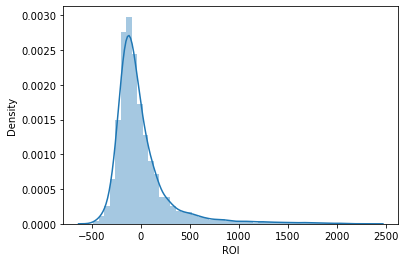

In [48]:
residuals = y_train - predictions
sns.distplot(residuals);

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


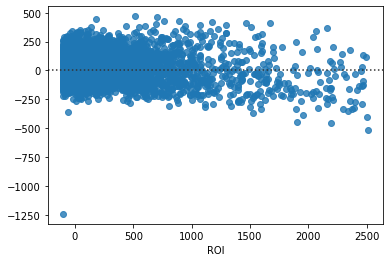

In [49]:
sns.residplot(y_train, predictions);

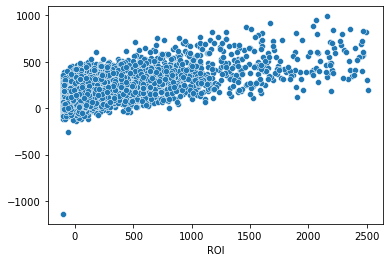

In [50]:
sns.scatterplot(x = y_train , y = predictions);

There is a high density of residuals to the left that have a linear relationship with the zero line in the middle residual plot, showing consistent error. The density plot at the top shows that there are some vast errors away from residuals, which are centred at just below zero. 

The scatter plot above indicates that this may be due to the higher, more sparse, values for ROI and so in a model further down the line, I will consider removing these points (above 1200), to test if accuracy may be improved.

The above plots are examples of reduced homoscedasticity, where the variance in errors is inconsistent.

<b>Feature Importance/ Coefficients</b>

In [51]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': elastic_model_grid.best_estimator_.coef_})

In [52]:
coefs['abs'] = abs(coefs.coef)

In [53]:
coefs.sort_values(by = 'abs' , ascending = False).head(70)

,Feature,coef,abs
22010,from_collection,227.979493,227.979493
18494,COMPOSER_John Williams,134.290673,134.290673
8192,ACTOR_Bernard Lee,118.045506,118.045506
8193,ACTOR_Lois Maxwell,115.336232,115.336232
5447,ACTOR_Clint Eastwood,101.330393,101.330393
...,...,...,...
18686,COMPOSER_Pino Donaggio,52.176917,52.176917
8718,ACTOR_Johan Leysen,52.164631,52.164631
10562,ACTOR_Belinda Balaski,51.944480,51.944480
10146,ACTOR_Patrick McDade,51.776508,51.776508


Above, its interesting to see that 'from_collection' has the largest impact on ROI, indicating tht films which are from a collection are far more likely to have increased ROI. Due to the models generalisation, we can be confident that 'from_collection exaplains most of the variability that our model can account for in the ROI. Furthermore, the actors Lois Maxwell and Bernard Lee prodominently played Miss Moneypenny and M from the james bond series during their careers, bolstering the idea that collections are key for profit making, especially james bond films. 





Now not taking into account the director, composer or actors to gauge what other factors were and werent important

In [54]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

,Feature,coef,abs
22010,from_collection,227.979493,227.979493
22033,original_language_bins_No Language,74.550642,74.550642
25,GENRE_Biography,-54.843453,54.843453
22022,month_6.0,53.956306,53.956306
22015,day_Tuesday,52.524782,52.524782
22023,month_7.0,52.247855,52.247855
18369,BLURB_set,-51.381835,51.381835
22032,original_language_bins_Hindi,-51.003645,51.003645
20,GENRE_Documentary,49.734627,49.734627
22030,original_language_bins_French,-48.251303,48.251303


In [ ]:
ax = coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50).plot(kind = 'hbar', x = 'Feature',
                                                 y = 'coef', color = 'lightskyblue');
ax.set_facecolor('lightchoral');
ax.set_title('Coefficients for the ElasticNet Linear Regression');




In [55]:
#check percentage of variables that have become zero
coefs[coefs['abs'] == 0].shape[0]

16036

In [56]:
print(f'{round((16036/data.shape[1] * 100) , 2)} of the variables have been squeezed to zero by the 92% lasso elastic net model')

72.83 of the variables have been squeezed to zero by the 92% lasso elastic net model


<b> Intercept </b>

In [ ]:
print(f'When no variables are taken into account, any film in the dataset is expected to have {round(elastic_model_grid.best_estimator_.intercept_,2)}')

<h2>Decision Tree Regressor model Grid Search</h2>

In [57]:
#create model object
dtree_reg = DecisionTreeRegressor()



In [58]:
#check the features to iterate through
dtree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
#confirm the parameters to iterate through
dtree_reg_params = {'criterion':['mse'],
                   'max_depth':[x for x in range(3,16)],
                   'ccp_alpha': np.logspace(-4,4,10)}


#create the grid search cv object
dtree_reg_grid = GridSearchCV(dtree_reg, dtree_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
dtree_reg_grid.fit(x_train_trans,y_train)

Fitting 4 folds for each of 130 candidates, totalling 520 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=3,
             param_grid={'ccp_alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'criterion': ['mse'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15]},
             verbose=1)

<b>Resulting Scores</b>

In [60]:
#the best estimator
dtree_reg_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=1291.5496650148827, max_depth=8)

In [61]:
#training score cross validated
dtree_reg_grid.best_score_

0.05627066928799951

In [62]:
#test score
dtree_reg_grid.score(x_test_trans,y_test)

0.0961537553701155

In [63]:


print(f'Training Accuracy: {dtree_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(dtree_reg_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {dtree_reg_grid.score(x_test_trans,y_test)}')

Training Accuracy: 0.05627066928799951
Mean CV Score: 0.05675080459270658
Testing Accuracy: 0.0961537553701155


The decision tree model has performed marginally better than the baseline for the traing data but significantly worse for the testing data, not only predicting poorly, but also having a very low generalisation.

<b>feature importance</b>

In [64]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': dtree_reg_grid.best_estimator_.feature_importances_})
coefs

,Feature,coef
0,scaler__runtime,0.000000
1,scaler__inf_budget,0.138922
2,scaler__blurb_length,0.000000
3,scaler__blurb_objectivity,0.000000
4,scaler__blurb_polarity,0.000000
...,...,...
22032,original_language_bins_Hindi,0.000000
22033,original_language_bins_No Language,0.000000
22034,original_language_bins_Other,0.000000
22035,original_language_bins_Spanish,0.000000


In [65]:
coefs['abs'] = abs(coefs.coef)

In [66]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

,Feature,coef,abs
22010,from_collection,0.861078,0.861078
1,scaler__inf_budget,0.138922,0.138922
14677,Director_Mike Mills,0.000000,0.000000
14696,Director_Michael Sarne,0.000000,0.000000
14695,Director_Martha Coolidge,0.000000,0.000000


The only consistancy with this model and the linear regression model is that 'from_collection' is an important variable that mostly contributes (86% of the information gain in the decision tree model) the small amount of variance in the ROI that can be accounted for by our model.

In [54]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

,Feature,coef,abs
22010,from_collection,227.979493,227.979493
22033,original_language_bins_No Language,74.550642,74.550642
25,GENRE_Biography,-54.843453,54.843453
22022,month_6.0,53.956306,53.956306
22015,day_Tuesday,52.524782,52.524782
22023,month_7.0,52.247855,52.247855
18369,BLURB_set,-51.381835,51.381835
22032,original_language_bins_Hindi,-51.003645,51.003645
20,GENRE_Documentary,49.734627,49.734627
22030,original_language_bins_French,-48.251303,48.251303


<h2>Support Vector Regressor model Grid Search</h2>

In [67]:
#create model object
svr_reg = svm.SVR()



In [68]:
#check the features to iterate through
svr_reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [69]:
#confirm the parameters to iterate through
svr_reg_params = {'C':np.logspace(-4,4,10),
                   'kernel':['linear']}


#create the grid search cv object
svr_reg_grid = GridSearchCV(svr_reg, svr_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
svr_reg_grid.fit(x_train_trans,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=4, estimator=SVR(), n_jobs=3,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'kernel': ['linear']},
             verbose=1)

<b>Resulting Scores</b>

In [70]:
#the best estimator
svr_reg_grid.best_estimator_

SVR(C=21.54434690031882, kernel='linear')

In [71]:
#training score cross validated
svr_reg_grid.best_score_

0.043584046481667

In [72]:
#test score
test_score = svr_reg_grid.score(x_test_trans,y_test)

In [74]:

print(f'Training Accuracy: {svr_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(svr_reg_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.043584046481667
Mean CV Score: 0.042148669095389855
Testing Accuracy: 0.04777877414023268


The support vector machine regressor model is also a poor model that generalises well. It does however, predict more effectively than assuming ROI is equal to the baseline.

<b>feature importance</b>

In [75]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': svr_reg_grid.best_estimator_.coef_[0]})
coefs

,Feature,coef
0,scaler__runtime,30.829429
1,scaler__inf_budget,-28.445044
2,scaler__blurb_length,0.344363
3,scaler__blurb_objectivity,-1.287230
4,scaler__blurb_polarity,-1.069886
...,...,...
22032,original_language_bins_Hindi,-24.353298
22033,original_language_bins_No Language,43.207005
22034,original_language_bins_Other,-6.250973
22035,original_language_bins_Spanish,1.633293


In [76]:
coefs['abs'] = abs(coefs.coef)

In [77]:
coefs.sort_values(by = 'abs' , ascending = False).head(30)

,Feature,coef,abs
22010,from_collection,172.710356,172.710356
8193,ACTOR_Lois Maxwell,154.099031,154.099031
8192,ACTOR_Bernard Lee,129.266081,129.266081
6319,ACTOR_Robert Wuhl,129.266081,129.266081
3327,ACTOR_Sally Field,125.719153,125.719153


yet again, we see 'from_collection' to be representing most of the variability (information) expalined by our model.

In [ ]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

<h2>Lasso Regressor model Grid Search</h2>

In [78]:
#create model object
lasso_lar_reg = Lasso()

In [79]:
#check the features to iterate through
lasso_lar_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [80]:
#confirm the parameters to iterate through
lasso_lar_reg_params = {'alpha': np.logspace(-4,4,15)
                       }


#create the grid search cv object
lasso_lar_reg_grid = GridSearchCV(lasso_lar_reg, lasso_lar_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
lasso_lar_reg_grid.fit(x_train_trans,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4, estimator=Lasso(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04])},
             verbose=1)

<b>Resulting Scores</b>

In [81]:
#the best estimator
lasso_lar_reg_grid.best_estimator_

Lasso()

In [82]:
#training score cross validated
lasso_lar_reg_grid.best_score_

0.09183970732029487

In [83]:
#test score
test_score = lasso_lar_reg_grid.score(x_test_trans,y_test)

In [85]:


print(f'Training Accuracy: {lasso_lar_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(lasso_lar_reg_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.09183970732029487
Mean CV Score: 0.0896994433341235
Testing Accuracy: 0.1141530795778054


The lasso regression model has performed worse than the elastic net, but still generalises well.

<b>feature importance</b>

In [86]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': lasso_lar_reg_grid.best_estimator_.coef_})
coefs

,Feature,coef
0,scaler__runtime,36.230378
1,scaler__inf_budget,-35.845885
2,scaler__blurb_length,1.070829
3,scaler__blurb_objectivity,-3.776241
4,scaler__blurb_polarity,-0.000000
...,...,...
22032,original_language_bins_Hindi,-44.262784
22033,original_language_bins_No Language,34.292190
22034,original_language_bins_Other,-10.355153
22035,original_language_bins_Spanish,0.000000


In [87]:
coefs['abs'] = abs(coefs.coef)

In [88]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

,Feature,coef,abs
22010,from_collection,244.878714,244.878714
18494,COMPOSER_John Williams,161.028046,161.028046
8193,ACTOR_Lois Maxwell,88.834891,88.834891
5447,ACTOR_Clint Eastwood,68.211696,68.211696
22022,month_6.0,57.968135,57.968135


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


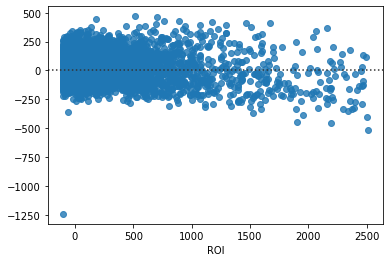

In [89]:
sns.residplot(y_train, predictions);

<b> Intercept </b>

In [ ]:
print(f'When no variables are taken into account, any film in the dataset is expected to have {round(lasso_lar_reg_grid.best_estimator_.intercept_,2)}')

<h2>Ridge Regressor model Grid Search</h2>

In [90]:
#create model object
sgd_reg = Ridge()



In [91]:
#check the features to iterate through
sgd_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [92]:
#confirm the parameters to iterate through
sgd_reg_params = {'alpha': np.logspace(-4,4,15)}


#create the grid search cv object
sgd_reg_grid = GridSearchCV(sgd_reg, sgd_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
sgd_reg_grid.fit(x_train_trans,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04])},
             verbose=1)

<b>Resulting Scores</b>

In [93]:
#the best estimator
sgd_reg_grid.best_estimator_

Ridge(alpha=51.79474679231202)

In [94]:
#training score cross validated
sgd_reg_grid.best_score_

0.10958926839770705

In [95]:
#test score
test_score = sgd_reg_grid.score(x_test_trans,y_test)

In [97]:

print(f'Training Accuracy: {sgd_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(sgd_reg_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.10958926839770705
Mean CV Score: 0.11000270730060047
Testing Accuracy: 0.13545115478824454


The ridge regressor model..

<b>feature importance</b>

In [98]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': sgd_reg_grid.best_estimator_.coef_})
coefs

,Feature,coef
0,scaler__runtime,36.253096
1,scaler__inf_budget,-46.409769
2,scaler__blurb_length,-5.600299
3,scaler__blurb_objectivity,-3.702559
4,scaler__blurb_polarity,-2.277179
...,...,...
22032,original_language_bins_Hindi,-51.580654
22033,original_language_bins_No Language,66.036829
22034,original_language_bins_Other,-11.235542
22035,original_language_bins_Spanish,11.417884


In [99]:
coefs['abs'] = abs(coefs.coef)

In [100]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

,Feature,coef,abs
22010,from_collection,225.829792,225.829792
18494,COMPOSER_John Williams,111.777793,111.777793
8192,ACTOR_Bernard Lee,98.657949,98.657949
8193,ACTOR_Lois Maxwell,97.075067,97.075067
5447,ACTOR_Clint Eastwood,87.728702,87.728702


Both lasso and ridge have also bee consistent with the results of the top 3 variables contributing to ROI

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


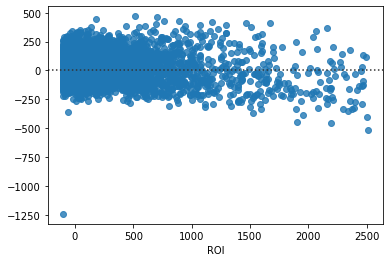

In [101]:
sns.residplot(y_train, predictions);

<b> Intercept </b>

In [ ]:
print(f'When no variables are taken into account, any film in the dataset is expected to have {round(sgd_reg_grid.best_estimator_.intercept_,2)}')

<h1> Principal Component Analysis </h1>

Reducing the dimentionality of a dataset helps to reduce multicolinearity between variables and reduce the number of less important features

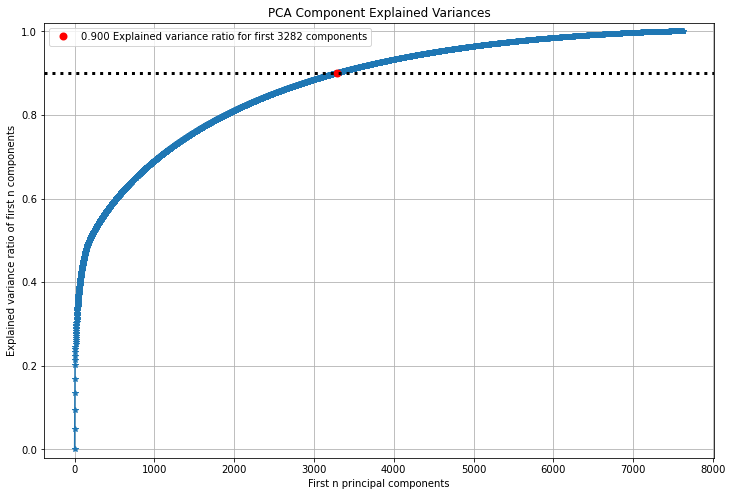

In [102]:
from sklearn.decomposition import PCA
from scikitplot.decomposition import plot_pca_component_variance

#the maximum number of components allowed is the total number of observations
pca = PCA(n_components = x_train_trans.shape[0])

pca_to_plot = pca.fit(x_train_trans)




#test to see the variability in the data over all the components to gauge the most useful number of components to use:
#90% seems a good balance point, increasing this to 95% will add another 1000 components, which will be computationally expencive.
plot_pca_component_variance(pca_to_plot , target_explained_variance = 0.90, figsize = (12,8));

now choose the number of components you want based off the amount of variance(infomation) explained by each component above

In [103]:
number_of_components = 3262
pca = PCA(n_components = number_of_components)
pca_data_train = pd.DataFrame(pca.fit_transform(x_train_trans), 
                             columns = [f'PC{x}' for x in range(1,(number_of_components +1))])

pca_data_test =pd.DataFrame(pca.transform(x_test_trans), 
                            columns = [f'PC{x}' for x in range(1,(number_of_components +1))])

In [104]:
pca_data_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC3260,PC3261,PC3262,PC3263,PC3264,PC3265,PC3266,PC3267,PC3268,PC3269
0,-0.149588,-1.423460,0.677507,-0.130664,-0.655379,0.762544,0.187115,0.111314,0.121301,-0.115339,...,-0.005264,-0.000699,0.031714,0.024601,0.001449,0.001890,-0.009969,-0.018393,0.023055,-0.004626
1,-1.339080,0.858063,-0.680894,0.448075,0.508915,0.954127,-0.123933,0.259384,-0.555246,0.152304,...,0.004468,-0.015382,-0.012823,-0.033520,0.022114,-0.003611,-0.007651,0.025840,0.007698,-0.026569
2,-0.453555,-1.621226,-1.007208,1.143276,-0.538874,0.107632,0.722121,-0.316215,-0.096323,-0.022286,...,0.001105,0.004944,-0.012239,0.019037,0.014505,0.013811,-0.010344,-0.038188,0.013084,0.028132
3,-0.115709,0.376919,-0.068813,-0.139507,0.769582,0.171938,-0.638395,0.173752,-0.605999,-0.398000,...,0.032038,0.042582,-0.032592,-0.029157,0.014791,-0.000554,-0.022604,-0.046749,0.022605,-0.014931
4,3.387912,0.042738,-0.966302,-1.169079,0.428449,0.368115,0.557071,0.141307,0.033409,0.165190,...,-0.003092,-0.068383,-0.013392,0.004694,0.002260,-0.035713,0.018345,-0.059012,-0.030024,0.064639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,-0.815650,0.831019,0.134304,1.184569,-0.142646,-0.936002,-0.437095,-0.132832,0.593257,-0.008946,...,0.036928,0.052452,-0.022756,0.021899,0.013749,0.001162,-0.013106,-0.006164,-0.035053,0.023083
1904,0.045225,0.105659,0.237979,0.000074,0.155178,-0.392011,-0.674218,0.432774,0.873637,-0.438607,...,-0.021555,-0.035482,0.009517,-0.002519,0.051383,0.004212,-0.010560,0.045862,-0.029496,0.024348
1905,-0.631022,0.933669,0.234322,-1.643352,1.055328,0.410087,0.201505,0.236522,-0.041097,-0.297688,...,-0.006769,-0.006274,-0.005427,0.014633,-0.002822,0.046702,0.004746,-0.024180,0.037176,-0.035983
1906,-0.446060,1.718925,-1.497552,0.514851,-1.060713,0.701170,0.617888,-0.406673,0.969526,0.046335,...,-0.026105,-0.023723,-0.016501,-0.004458,0.006092,-0.004735,0.001377,0.011957,0.014074,-0.007185


<h3>Elastic Net CV to find the optimal Value for C (regularisation strength increases with reduced C) and L1 ratio </h3>

In [105]:
#model object
elastic_model = ElasticNet()

In [106]:
#investigate parameters
elastic_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [107]:
#confirm the parameters to iterate through
elastic_model_params = {'alpha': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15)}


#create the grid search cv object
elastic_model_grid = GridSearchCV(elastic_model, elastic_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
elastic_model_grid.fit(pca_data_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             verbose=1)

<b>Resulting Scores</b>

In [108]:
#the best estimator
elastic_model_grid.best_estimator_

ElasticNet(alpha=0.019306977288832496, l1_ratio=0.3571428571428571)

In [109]:
#training score cross validated
elastic_model_grid.best_score_

0.10846121117774539

In [110]:
#test score
test_score = elastic_model_grid.score(pca_data_test,y_test)

In [111]:


print(f'Training Accuracy: {elastic_model_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(elastic_model_grid.best_estimator_, pca_data_train, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.10846121117774539
Mean CV Score: 0.10846121117774529
Testing Accuracy: 0.13438139320432252


<b> Mean Square Error </b>

In [112]:
#get the predictions for the training data
predictions = elastic_model_grid.best_estimator_.predict(pca_data_train)

In [113]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions)

100719.31071281202

In [114]:
#root mean square error
np.sqrt(mean_squared_error(y_train,predictions))

317.36305820434114

Worse scores than previous analysis which shows that dimensionality reduction of the data has not improved the model

<b>Residual Plot</b>

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


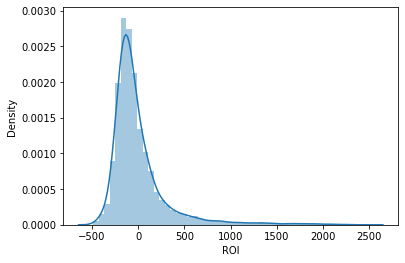

In [115]:
residuals = y_train - predictions
sns.distplot(residuals);

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


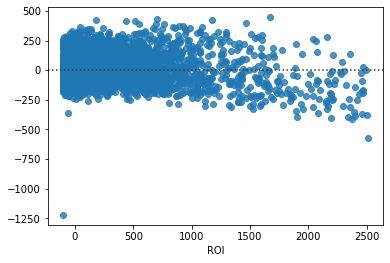

In [116]:
sns.residplot(y_train, predictions);

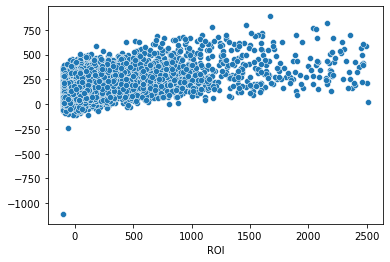

In [117]:
sns.scatterplot(x = y_train , y = predictions);

<b>Feature Importance/ Coefficients</b>

In [118]:
coefs = pd.DataFrame({'Feature': pca_data_train.columns,
                     'coef': elastic_model_grid.best_estimator_.coef_})

In [119]:
coefs['abs'] = abs(coefs.coef)

In [120]:
coefs.sort_values(by = 'abs' , ascending = False).head(70)

,Feature,coef,abs
12,PC13,-154.095919,154.095919
11,PC12,-91.954900,91.954900
13,PC14,90.805239,90.805239
6,PC7,-84.229240,84.229240
87,PC88,-73.509839,73.509839
...,...,...,...
324,PC325,37.025957,37.025957
1813,PC1814,-36.729971,36.729971
915,PC916,36.668261,36.668261
86,PC87,36.518135,36.518135


PC14 has the highest coeficient by a large margin and therefore contrbutes the most to ROI.

If we find out which variable is contributing most to PC14, we can assume this variable explains the variability of ROI the best, particularly given the fact that this principle component affects the ROI far greater than the other components.

In [121]:
list(pca.components_[14]).index(pca.components_[14].max())

18359

In [122]:
x_train_trans.columns[22010]

'from_collection'

From_collection again proving to be an important predictor in our models.

<h2>Decision Tree Regressor model Grid Search</h2>

In [123]:
#create model object
dtree_reg = DecisionTreeRegressor()



In [124]:
#check the features to iterate through
dtree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [125]:
#confirm the parameters to iterate through
dtree_reg_params = {'criterion':['mse'],
                   'max_depth':[x for x in range(3,16)],
                   'ccp_alpha': np.logspace(-4,4,10)}


#create the grid search cv object
dtree_reg_grid = GridSearchCV(dtree_reg, dtree_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
dtree_reg_grid.fit(pca_data_train,y_train)

Fitting 4 folds for each of 130 candidates, totalling 520 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=3,
             param_grid={'ccp_alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'criterion': ['mse'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15]},
             verbose=1)

<b>Resulting Scores</b>

In [126]:
#the best estimator
dtree_reg_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=1291.5496650148827, max_depth=3)

In [127]:
#training score cross validated
dtree_reg_grid.best_score_

0.021313910972394157

In [128]:
#test score
test_score = dtree_reg_grid.score(pca_data_test,y_test)

In [130]:

print(f'Training Accuracy: {dtree_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(dtree_reg_grid.best_estimator_, pca_data_train, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.021313910972394157
Mean CV Score: 0.006167902529986935
Testing Accuracy: 0.02597419846284299


The decision tree model has performed worse than the baseline.

<b>feature importance</b>

In [131]:
coefs = pd.DataFrame({'Feature': pca_data_train.columns,
                     'coef': dtree_reg_grid.best_estimator_.feature_importances_})
coefs

,Feature,coef
0,PC1,0.0
1,PC2,0.0
2,PC3,0.0
3,PC4,0.0
4,PC5,0.0
...,...,...
3264,PC3265,0.0
3265,PC3266,0.0
3266,PC3267,0.0
3267,PC3268,0.0


In [132]:
coefs['abs'] = abs(coefs.coef)

In [133]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

,Feature,coef,abs
12,PC13,0.418322,0.418322
8,PC9,0.203808,0.203808
1113,PC1114,0.196608,0.196608
9,PC10,0.181262,0.181262
0,PC1,0.000000,0.000000


<h2>Support Vector Regressor model Grid Search</h2>

In [134]:
#create model object
svr_reg = svm.SVR()



In [135]:
#check the features to iterate through
svr_reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [4]:
#confirm the parameters to iterate through
svr_reg_params = {'C':np.logspace(-4,4,10),
                   'kernel':['linear']}


#create the grid search cv object
svr_reg_grid = GridSearchCV(svr_reg, svr_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
svr_reg_grid.fit(pca_data_train,y_train)

<b>Resulting Scores</b>

In [ ]:
#the best estimator
svr_reg_grid.best_estimator_

In [ ]:
#training score cross validated
svr_reg_grid.best_score_

In [ ]:
#test score
test_score = svr_reg_grid.score(pca_data_test,y_test)

In [ ]:


print(f'Training Accuracy: {svr_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(svr_reg_grid.best_estimator_, pca_data_train, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

The support vector machine regressor model..

<b>feature importance</b>

In [ ]:
coefs = pd.DataFrame({'Feature': pca_data_train.columns,
                     'coef': svr_reg_grid.best_estimator_.coef_[0]})
coefs

In [ ]:
coefs['abs'] = abs(coefs.coef)

In [ ]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

<b> Intercept </b>

In [ ]:
print(f'When no variables are taken into account, any film in the dataset is expected to have {round(svr_reg_grid.best_estimator_.intercept_,2)}')

<h2>Lasso Regressor model Grid Search</h2>

In [ ]:
#create model object
lasso_lar_reg = Lasso()



In [ ]:
#check the features to iterate through
lasso_lar_reg.get_params()

In [ ]:
#confirm the parameters to iterate through
lasso_lar_reg_params = {'alpha':np.logspace(-4,4,10)}


#create the grid search cv object
lasso_lar_reg_grid = GridSearchCV(lasso_lar_reg, lasso_lar_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
lasso_lar_reg_grid.fit(pca_data_train,y_train)

<b>Resulting Scores</b>

In [ ]:
#the best estimator
lasso_lar_reg_grid.best_estimator_

In [ ]:
#training score cross validated
lasso_lar_reg_grid.best_score_

In [ ]:
#test score
test_score = lasso_lar_reg_grid.score(pca_data_test,y_test)

In [ ]:


print(f'Training Accuracy: {lasso_lar_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(lasso_lars_reg_grid.best_estimator_, pca_data_train, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

The support vector machine regressor model..

<b>feature importance</b>

In [ ]:
coefs = pd.DataFrame({'Feature': pca_data_train.columns,
                     'coef': lasso_lar_reg_grid.best_estimator_.coef_})
coefs

In [ ]:
coefs['abs'] = abs(coefs.coef)

In [ ]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

<b> Intercept </b>

In [ ]:
print(f'When no variables are taken into account, any film in the dataset is expected to have {round(lasso_lar_reg_grid.best_estimator_.intercept_,2)}')

<h2>Ridge Regressor model Grid Search</h2>

In [ ]:
#create model object
sgd_reg = Ridge()

In [ ]:
#check the features to iterate through
sgd_reg.get_params()

In [ ]:
#confirm the parameters to iterate through
sgd_reg_params = {'alpha':np.logspace(-4,4,10)}


#create the grid search cv object
sgd_reg_grid = GridSearchCV(sgd_reg, sgd_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
sgd_reg_grid.fit(pca_data_train,y_train)

<b>Resulting Scores</b>

In [ ]:
#the best estimator
sgd_reg_grid.best_estimator_

In [ ]:
#training score cross validated
sgd_reg_grid.best_score_

In [ ]:
#test score
test_score = sgd_reg_grid.score(pca_data_test,y_test)

In [ ]:

print(f'Training Accuracy: {sgd_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(sgd_reg_grid.best_estimator_, pca_data_train, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

The support vector machine regressor model..

<b>feature importance</b>

In [ ]:
coefs = pd.DataFrame({'Feature': pca_data_train.columns,
                     'coef': sgd_reg_grid.best_estimator_.coef_})
coefs

In [ ]:
coefs['abs'] = abs(coefs.coef)

In [ ]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

<b> Intercept </b>

In [ ]:
print(f'When no variables are taken into account, any film in the dataset is expected to have {round(sgd_reg_grid.best_estimator_.intercept_,2)}')

<h3> Removal of ROI outliers</h3>

Removing the outliers will sacrifice the ability to represent the population, a figure beleived to be in the region of 10,000. But will removing them, as mentioned before in the first modelling section, reduce the mse and ultimately imporve the r2 score, increasing coeficient relaibility?

Its important to note that by removing the data, the results are only relevan to films whose ROI is below 1200.

In [137]:
data.head()

,runtime,ROI,month,day,inf_budget,blurb_length,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,...,COMPOSER_Matt Novack,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne,original_language_bins,from_collection,blurb_objectivity,blurb_polarity
0,248.0,61.363636,6.0,Wednesday,3.781901e+08,37.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.903075,0.000992
1,67.0,-46.093333,11.0,Friday,4.359348e+05,56.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.898970,0.012065
2,171.0,-98.668687,11.0,Thursday,7.594529e+07,68.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.814066,-0.071299
3,95.0,55.044771,6.0,Saturday,1.773128e+08,52.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,1,0.925194,0.005663
4,101.0,-21.981352,9.0,Friday,4.572874e+07,14.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.836830,-0.043080


In [138]:
data.shape

(9537, 22015)

In [139]:
df = data.copy()

Here, an outlier is considered to be anything above 3 times the std or lower than -3 times the std

In [140]:
df = df[(df.ROI < 3 * df.ROI.std()) & (df.ROI > -3 * df.ROI.std())]

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


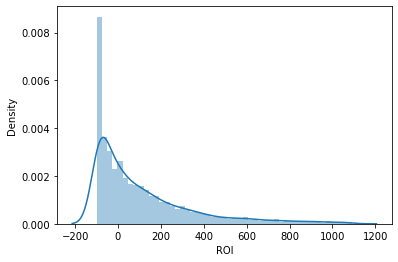

In [141]:
sns.distplot(df.ROI);

Interestingly, the values of ROI are limited to 1200, which was the beleived point in which the errors begain to stray from linearity, and become more separable, in the original analysis. 

In [142]:
y = df.pop('ROI')

In [143]:
X = df

In [144]:
X.shape

(9220, 22014)

<b> Baseline for the target variables </b>

In [145]:
y.mean()

108.49219608075104

<h1>Preprocessing</h1>

<b> dummies for day, month , original_language_bins </b>

In [146]:
X = pd.get_dummies(X, columns = ['day', 'month', 'original_language_bins'], dummy_na = True, drop_first = True)

In [147]:
X.shape

(9220, 22037)

<b>Train test split</b>

In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [149]:
x_train = pd.DataFrame(x_train ,columns = X.columns)
x_test = pd.DataFrame(x_test ,columns = X.columns)

<b>Standard Scaler on the Variables that are not binary/catagorical</b>

I'm just going to scale the continuous features to be able to retain explainability of the binary variables

In [150]:
scaler = StandardScaler()
scaler_columns = ['runtime', 'inf_budget', 'blurb_length','blurb_objectivity', 'blurb_polarity']

In [151]:
scale_transformer = ColumnTransformer([('scaler',scaler,scaler_columns)], remainder = 'passthrough', sparse_threshold = 0)

need to be able to get the feature names from scaling alone which you cannot do with just a standard scaler

'The function walks through the steps of the ColumnTransformer and returns the input column names when the transformer does not provide a get_feature_names() method. For pipelines, it walks through the pipeline steps and will return either the output columns of the pipeline or the input columns, if the pipeline creates no new columns.'

below is a function found from https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html
which does as described in the cell above. I will be using standard scaler on a set amount of columns and will create a dataframe using this output as the column headers.

In [252]:
import warnings
import sklearn
import pandas as pd



def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names


transform the x variables

In [153]:
x_train_trans = pd.DataFrame(scale_transformer.fit_transform(x_train), columns = get_feature_names(scale_transformer))

x_test_trans = pd.DataFrame(scale_transformer.transform(x_test), columns = get_feature_names(scale_transformer))

<ipython-input-152-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-152-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [154]:
x_train_trans

,scaler__runtime,scaler__inf_budget,scaler__blurb_length,scaler__blurb_objectivity,scaler__blurb_polarity,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,1.372304,-0.623290,-0.784712,-0.717366,-0.632967,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.137838,0.147521,0.432837,0.373940,-0.010484,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.914685,0.605290,0.470885,-0.617126,0.559876,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.051971,-0.425432,-0.974954,-1.795040,-0.671683,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.366647,-0.595972,-0.708615,1.641967,0.137489,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,0.960447,0.013622,-0.746664,-0.460950,-1.412601,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7372,-0.458171,-0.397644,-1.241293,-1.367404,-3.247222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7373,-0.229362,-0.716174,-0.404228,0.932472,-0.165485,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7374,-0.732742,-0.516888,-0.290083,0.932143,-0.181979,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Elastic Net CV to find the optimal Value for C (regularisation strength increases with reduced C) and L1 ratio </h3>

In [155]:
#model object
elastic_model = ElasticNet()

In [156]:
#investigate parameters
elastic_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [157]:
#confirm the parameters to iterate through
elastic_model_params = {'alpha': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15)}


#create the grid search cv object
elastic_model_grid = GridSearchCV(elastic_model, elastic_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
elastic_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             verbose=1)

<b>Resulting Scores</b>

In [158]:
#the best estimator
elastic_model_grid.best_estimator_

ElasticNet(alpha=0.019306977288832496, l1_ratio=0.5714285714285714)

In [159]:
#training score cross validated
elastic_model_grid.best_score_

0.15444385171286307

In [160]:
#test score
elastic_model_grid.score(x_test_trans,y_test)

0.14459905558717756

In [162]:


print(f'Training Accuracy: {elastic_model_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(elastic_model_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {elastic_model_grid.score(x_test_trans,y_test)}')

Training Accuracy: 0.15444385171286307
Mean CV Score: 0.15444385171286307
Testing Accuracy: 0.14459905558717756


The model seems to have generalised well with the testing data and improved from the last scores by ~0.04, which is a 40% increase in r-squared score.

<b> Mean Square Error </b>

In [163]:
#get the predictions for the training data
predictions = elastic_model_grid.best_estimator_.predict(x_train_trans)

In [164]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions)

33583.97012463674

significantly reduced mean squared error than before reiterates the improvment of fit for the model.

In [165]:
#root mean square error
np.sqrt(mean_squared_error(y_train,predictions))

183.2592975121228

In [166]:
y.std()

235.69859476306408

The root mean square error shows that the error for the regression line is still incredibly high, since the error is greater than the standard deviation!

<b>Residual Plot</b>

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


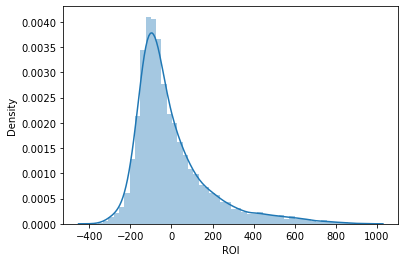

In [167]:
residuals = y_train - predictions
sns.distplot(residuals);

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


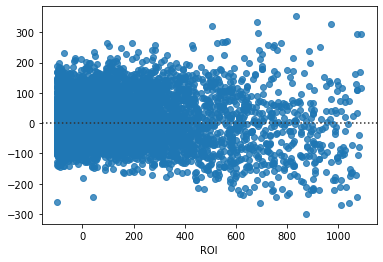

In [168]:
sns.residplot(y_train, predictions);

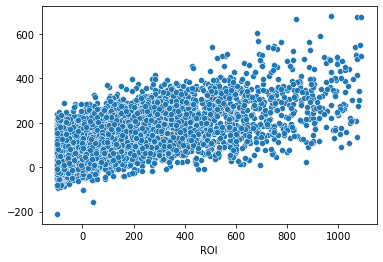

In [169]:
sns.scatterplot(x = y_train , y = predictions);

Here we can see a very similar pattern to the last model with all the data. The data still contains extremely high ROI values that can be removed, showed by the widening of the errors in the residual plot as the ROI increases. The widening in errors appears to occur aroud the 500 ROI mark. This will again reduce the representative power of the data but may potentially improve accuracy for films with ROI less than 500. 

<b>Feature Importance/ Coefficients</b>

In [170]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': elastic_model_grid.best_estimator_.coef_})

In [171]:
coefs['abs'] = abs(coefs.coef)

In [172]:
coefs.sort_values(by = 'abs' , ascending = False).head(70)

,Feature,coef,abs
22010,from_collection,159.720386,159.720386
18494,COMPOSER_John Williams,54.473252,54.473252
5447,ACTOR_Clint Eastwood,49.716090,49.716090
11435,ACTOR_Steve James,47.396885,47.396885
5344,ACTOR_Missi Pyle,45.890587,45.890587
...,...,...,...
1354,ACTOR_William H. OBrien,24.830555,24.830555
6289,ACTOR_Timothy Carhart,24.753294,24.753294
3758,ACTOR_Michael Stuhlbarg,24.710996,24.710996
5941,ACTOR_Ray Liotta,-24.694033,24.694033


Again 'from_collection' is proving to be the best variable for predicting ROI.

In [173]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

,Feature,coef,abs
22010,from_collection,159.720386,159.720386
25,GENRE_Biography,-42.642612,42.642612
22030,original_language_bins_French,-37.381800,37.381800
22033,original_language_bins_No Language,35.868244,35.868244
18418,BLURB_children,34.676048,34.676048
22023,month_7.0,34.528831,34.528831
18420,BLURB_girl,34.051847,34.051847
22022,month_6.0,32.758371,32.758371
22015,day_Tuesday,32.083653,32.083653
22016,day_Wednesday,31.518639,31.518639


In [174]:
#check percentage of variables that have become zero
coefs[coefs['abs'] == 0].shape[0]

5697

In [176]:
print(f'{round((5697/data.shape[1] * 100) , 2)} of the variables have been squeezed to zero by the 57% lasso elastic net model')

25.88 of the variables have been squeezed to zero by the 57% lasso elastic net model


Now only 25% of the variables have been reduced to zero, which is no surprise given the model is only 57% lasso, which regularises by adding the absoloute value of the beta coefficients multiplied by the alpha value which can result in the line of best fits' slope becoming zero.

<b> Intercept </b>

In [ ]:
print(f'Without any of the variables, the average film in this sample is expected to have an ROI of approximately {round(elastic_model_grid.best_estimator_.intercept_,2)}')

<b> Leaving out the SVR model now becuase it was performing worse than the linear regression models and the models themselves take time to run </b>

<h2>Lasso Regressor model Grid Search</h2>

In [177]:
#create model object
lasso_reg = Lasso()

In [178]:
#check the features to iterate through
lasso_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [179]:
#confirm the parameters to iterate through
lasso_reg_params = {'alpha': np.logspace(-4,4,15)}


#create the grid search cv object
lasso_lar_reg_grid = GridSearchCV(lasso_reg, lasso_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
lasso_lar_reg_grid.fit(x_train_trans,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4, estimator=Lasso(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04])},
             verbose=1)

<b>Resulting Scores</b>

In [180]:
#the best estimator
lasso_lar_reg_grid.best_estimator_

Lasso(alpha=0.2682695795279725)

In [181]:
#training score cross validated
lasso_lar_reg_grid.best_score_

0.12974645973116108

In [182]:
#test score
test_score = lasso_lar_reg_grid.score(x_test_trans,y_test)

In [185]:


print(f'Training Accuracy: {lasso_lar_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(lasso_lar_reg_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.12974645973116108
Mean CV Score: 0.13736438592270384
Testing Accuracy: 0.130668394082338


The lasso regressor model shows 

<b>feature importance</b>

In [188]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': lasso_lar_reg_grid.best_estimator_.coef_})
coefs

,Feature,coef
0,scaler__runtime,29.981356
1,scaler__inf_budget,-9.145365
2,scaler__blurb_length,-0.000000
3,scaler__blurb_objectivity,-3.360366
4,scaler__blurb_polarity,-3.285157
...,...,...
22032,original_language_bins_Hindi,-18.904640
22033,original_language_bins_No Language,43.119239
22034,original_language_bins_Other,-10.679331
22035,original_language_bins_Spanish,0.000000


In [189]:
coefs['abs'] = abs(coefs.coef)

In [190]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

,Feature,coef,abs
515,ACTOR_Valerie Curtin,198.330250,198.330250
22010,from_collection,176.018691,176.018691
11435,ACTOR_Steve James,167.731620,167.731620
12922,ACTOR_Park No-shik,158.841766,158.841766
4064,ACTOR_Georgie Glen,129.721774,129.721774


In [216]:
#INTERCEPT

lasso_lar_reg_grid.best_estimator_.intercept_

59.39434533308473

<h2>Ridge Regressor model Grid Search</h2>

In [191]:
#create model object
sgd_reg = Ridge()



In [192]:
#check the features to iterate through
sgd_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [193]:
#confirm the parameters to iterate through
sgd_reg_params = {'alpha': np.logspace(-4,4,15)}


#create the grid search cv object
sgd_reg_grid = GridSearchCV(sgd_reg, sgd_reg_params,
                              verbose = 1,
                              cv = 4,
                              n_jobs = 3)
sgd_reg_grid.fit(x_train_trans,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04])},
             verbose=1)

<b>Resulting Scores</b>

In [194]:
#the best estimator
sgd_reg_grid.best_estimator_

Ridge(alpha=51.79474679231202)

In [195]:
#training score cross validated
sgd_reg_grid.best_score_

0.1499166805236459

In [196]:
#test score
test_score = sgd_reg_grid.score(x_test_trans,y_test)

In [197]:


print(f'Training Accuracy: {sgd_reg_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(sgd_reg_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.1499166805236459
Mean CV Score: 0.154216812242346
Testing Accuracy: 0.14417696947100878


The support vector machine regressor model..

<b>feature importance</b>

In [198]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': sgd_reg_grid.best_estimator_.coef_})
coefs

,Feature,coef
0,scaler__runtime,28.116257
1,scaler__inf_budget,-14.026686
2,scaler__blurb_length,-0.114172
3,scaler__blurb_objectivity,-3.002925
4,scaler__blurb_polarity,-3.696610
...,...,...
22032,original_language_bins_Hindi,-16.659520
22033,original_language_bins_No Language,37.910450
22034,original_language_bins_Other,-7.744204
22035,original_language_bins_Spanish,11.927284


In [199]:
coefs['abs'] = abs(coefs.coef)

In [200]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

,Feature,coef,abs
22010,from_collection,159.895166,159.895166
18494,COMPOSER_John Williams,57.352226,57.352226
11435,ACTOR_Steve James,54.116915,54.116915
5447,ACTOR_Clint Eastwood,52.773845,52.773845
5344,ACTOR_Missi Pyle,50.682514,50.682514


In [215]:
#INTERCEPT

sgd_reg_grid.best_estimator_.intercept_

53.925673570246374

<h3> removal of decision trees </h3>

I decided not to use any other decision tree models becuase the decision tree models in previosu analysis had resulted in exceptionally poor models. Had the scores been high enough and generalising well, I will have used an XGBoost and other ensemble methods that allow the coefficients to be examined to increase the confidence in the variable coefficient scores.

<h1> Polynomial Features </h1>

So far, the models have had very good generalisation, shown by the test scores being better than, if not close to, the training scores. This gives us confidence that new data would also behave in this way. 


The high generalisation could also be telling us that the model is underfitting and that the complexity of the model is too low. 

will polynomial features on the continuous variables have a positive affect on r2-score?

<b>Standard Scaler on the Variables that are not binary/catagorical</b>

I'm just going to scale the continuous features to be able to retain explainability of the binary variables

In [201]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

scaler = StandardScaler()
scaler_columns = ['runtime', 'inf_budget', 'blurb_length','blurb_objectivity', 'blurb_polarity']

Always need to make the polynomial features before standardising the variables to avoid loss of signal (multiplying by umbers between 0-1 will also produce values between zero and one so we could miss out on valuble infomation!) and to prevent making random negatives by multiplying values below the mean by values above the mean.

In [202]:
scale_transformer = ColumnTransformer([('poly', poly , scaler_columns),
                                       ('scaler',scaler,scaler_columns)], 
                                      remainder = 'passthrough', sparse_threshold = 0)

transform the x variables

In [207]:
x_train_trans = pd.DataFrame(scale_transformer.fit_transform(x_train), columns = get_feature_names(scale_transformer))

x_test_trans = pd.DataFrame(scale_transformer.transform(x_test), columns = get_feature_names(scale_transformer))

<ipython-input-152-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-152-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [208]:
x_train_trans

,poly__1,poly__x0,poly__x1,poly__x2,poly__x3,poly__x4,poly__x0^2,poly__x0 x1,poly__x0 x2,poly__x0 x3,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,1.0,139.0,4.680242e+06,25.0,0.835119,-0.035119,19321.0,6.505536e+08,3475.0,116.081548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,106.0,4.222528e+07,57.0,0.894280,-0.006324,11236.0,4.475879e+09,6042.0,94.793662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,129.0,6.452248e+07,58.0,0.840553,0.020060,16641.0,8.323400e+09,7482.0,108.431358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,132.0,1.431758e+07,20.0,0.776697,-0.036910,17424.0,1.889921e+09,2640.0,102.524038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,101.0,6.010842e+06,27.0,0.963021,0.000521,10201.0,6.070950e+08,2727.0,97.265104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,1.0,130.0,3.570326e+07,26.0,0.849020,-0.071183,16900.0,4.641424e+09,3380.0,110.372549,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7372,1.0,99.0,1.567114e+07,13.0,0.799880,-0.156050,9801.0,1.551443e+09,1287.0,79.188101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7373,1.0,104.0,1.560060e+05,35.0,0.924558,-0.013494,10816.0,1.622463e+07,3640.0,96.154072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7374,1.0,93.0,9.862914e+06,38.0,0.924541,-0.014257,8649.0,9.172510e+08,3534.0,85.982271,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1> Due to the ElasticNet linear regression model performing the best, this will test the polynomial features to see if there is a difference in performance </h1>

<h3>Elastic Net CV to find the optimal Value for C (regularisation strength increases with reduced C) and L1 ratio </h3>

In [209]:
#model object
elastic_model = ElasticNet()

In [210]:
#investigate parameters
elastic_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [217]:
#confirm the parameters to iterate through
elastic_model_params = {'alpha': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15)}


#create the grid search cv object
elastic_model_grid = GridSearchCV(elastic_model, elastic_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
elastic_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154684101.59140596, tolerance: 40556.93853115172
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             verbose=1)

<b>Resulting Scores</b>

In [218]:
#the best estimator
elastic_model_grid.best_estimator_

ElasticNet(alpha=0.019306977288832496, l1_ratio=0.2857142857142857)

In [219]:
#training score cross validated
elastic_model_grid.best_score_

0.12110068499630322

In [220]:
#test score
elastic_model_grid.score(x_test_trans,y_test)

0.1275305828952894

In [222]:


print(f'Training Accuracy: {elastic_model_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(elastic_model_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {elastic_model_grid.score(x_test_trans,y_test)}')

Training Accuracy: 0.12110068499630322


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119122764.46509236, tolerance: 32373.323336491245
  model = cd_fast.enet_coordinate_descent(
/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121745368.0575757, tolerance: 32937.03083156753
  model = cd_fast.enet_coordinate_descent(
/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122342153.84596202, tolerance: 32645.376660249087
  model = cd_fast.enet_coordinate_descent(
/Users/chrismembrey/opt/anaconda3/lib/python3.8/

Mean CV Score: 0.12110068499630355
Testing Accuracy: 0.1275305828952894


<b> Mean Square Error </b>

In [223]:
#get the predictions for the training data
predictions = elastic_model_grid.best_estimator_.predict(x_train_trans)

In [224]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions)

36584.038809190715

significantly reduced mean squared error than before reiterates the improvment of fit for the model.

In [225]:
#root mean square error
np.sqrt(mean_squared_error(y_train,predictions))

191.2695449076792

In [241]:
print('Standard Error: ', y.std()/np.sqrt(data.shape[0]))
print('Standard Deviation: ', y.std())

Standard Error:  2.4135211110827126
Standard Deviation:  235.69859476306408


The root mean square error shows that the error for the regression line is still incredibly high, since the error is greater than the standard error (the standard deviation of the mean of many means taken from samples of y)!

<b>Residual Plot</b>

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


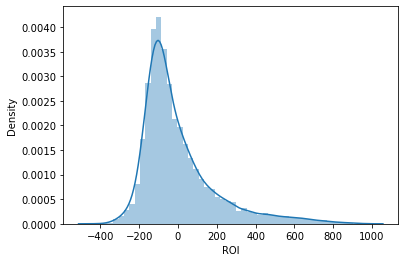

In [227]:
residuals = y_train - predictions
sns.distplot(residuals);

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


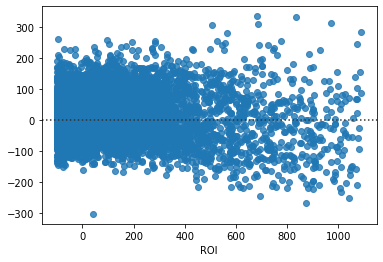

In [228]:
sns.residplot(y_train, predictions);

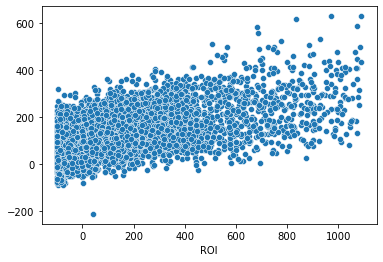

In [229]:
sns.scatterplot(x = y_train , y = predictions);

<b>Feature Importance/ Coefficients</b>

In [230]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': elastic_model_grid.best_estimator_.coef_})

In [231]:
coefs['abs'] = abs(coefs.coef)

In [232]:
coefs.sort_values(by = 'abs' , ascending = False).head(70)

,Feature,coef,abs
22031,from_collection,152.726511,152.726511
18515,COMPOSER_John Williams,42.175386,42.175386
5468,ACTOR_Clint Eastwood,37.722769,37.722769
22051,original_language_bins_French,-35.565304,35.565304
22044,month_7.0,32.668681,32.668681
...,...,...,...
912,ACTOR_John Franchi,18.355621,18.355621
10248,ACTOR_Aamir Khan,18.154162,18.154162
4410,ACTOR_Craig T. Nelson,18.112813,18.112813
18493,COMPOSER_John Powell,18.064492,18.064492


In [233]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

,Feature,coef,abs
22031,from_collection,152.726511,152.726511
22051,original_language_bins_French,-35.565304,35.565304
22044,month_7.0,32.668681,32.668681
22043,month_6.0,32.201864,32.201864
46,GENRE_Biography,-31.861549,31.861549
22037,day_Wednesday,30.614635,30.614635
22036,day_Tuesday,29.648558,29.648558
18441,BLURB_girl,29.380155,29.380155
18439,BLURB_children,29.155759,29.155759
22054,original_language_bins_No Language,28.837237,28.837237


In [234]:
#check percentage of variables that have become zero
coefs[coefs['abs'] == 0].shape[0]

3345

In [237]:
print(f'{round((3345/data.shape[1] * 100) , 2)} of the variables have been squeezed to zero by the 57% lasso elastic net model')

15.19 of the variables have been squeezed to zero by the 57% lasso elastic net model


<b> Intercept </b>

In [236]:
elastic_model_grid.best_estimator_.intercept_

-66.50039314670543

Without any of the variables, the average film in this sample is expected to have an ROI of approximately -66%

<h1> Removal of Datapoints above 500 ROI </h1>

Will removing the datapoints greater than 500 increase the r2 score and make for a more impactfull model?
This model will only be relevent for this specific sample, rather than the population of films

In [312]:
data.head()

,runtime,ROI,month,day,inf_budget,blurb_length,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,...,COMPOSER_Matt Novack,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne,original_language_bins,from_collection,blurb_objectivity,blurb_polarity
0,248.0,61.363636,6.0,Wednesday,3.781901e+08,37.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.903075,0.000992
1,67.0,-46.093333,11.0,Friday,4.359348e+05,56.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.898970,0.012065
2,171.0,-98.668687,11.0,Thursday,7.594529e+07,68.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.814066,-0.071299
3,95.0,55.044771,6.0,Saturday,1.773128e+08,52.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,1,0.925194,0.005663
4,101.0,-21.981352,9.0,Friday,4.572874e+07,14.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.836830,-0.043080


In [313]:
data.shape

(9537, 22015)

In [488]:
df = data.copy()

Here, an outlier is considered to be anything above 3 times the std or lower than -3 times the std

In [489]:
df = df[(df.ROI <= 500)]

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


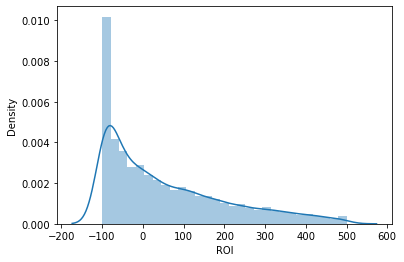

In [316]:
sns.distplot(df.ROI);

In [317]:
y = df.pop('ROI')

In [318]:
X = df

In [319]:
X.shape

(8487, 22014)

<b> Baseline for the target variables </b>

In [320]:
y.mean()

55.27731636502938

<h1>Preprocessing</h1>

<b> dummies for day, month , original_language_bins </b>

In [321]:
X = pd.get_dummies(X, columns = ['day', 'month', 'original_language_bins'], dummy_na = True, drop_first = True)

In [322]:
X.shape

(8487, 22037)

<b>Train test split</b>

In [323]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [324]:
x_train = pd.DataFrame(x_train ,columns = X.columns)
x_test = pd.DataFrame(x_test ,columns = X.columns)

<b>Standard Scaler on the Variables that are not binary/catagorical</b>

I'm just going to scale the continuous features to be able to retain explainability of the binary variables

In [325]:
scaler = StandardScaler()
scaler_columns = ['runtime', 'inf_budget', 'blurb_length','blurb_objectivity', 'blurb_polarity']

In [326]:
scale_transformer = ColumnTransformer([('scaler',scaler,scaler_columns)], remainder = 'passthrough', sparse_threshold = 0)

transform the x variables

In [327]:
x_train_trans = pd.DataFrame(scale_transformer.fit_transform(x_train), columns = get_feature_names(scale_transformer))

x_test_trans = pd.DataFrame(scale_transformer.transform(x_test), columns = get_feature_names(scale_transformer))

<ipython-input-259-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-259-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [328]:
x_train_trans

,scaler__runtime,scaler__inf_budget,scaler__blurb_length,scaler__blurb_objectivity,scaler__blurb_polarity,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,-0.219755,-0.501266,-0.240424,-0.858454,0.961117,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.154793,-0.758257,-0.468783,-1.148249,-1.463706,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.968852,-0.332246,-0.278484,0.850441,0.978571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.342067,0.189282,-0.506843,-1.302408,-1.784511,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.167991,-0.564678,-1.001622,-1.338606,-1.513607,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,0.061156,-0.460406,0.025996,0.593875,-0.638724,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6785,-0.500667,0.440881,-0.963562,0.385457,0.167089,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6786,-0.687941,-0.390417,-0.392664,1.503892,-0.395268,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6787,-0.875215,-0.624466,1.510332,0.449613,-0.350423,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Elastic Net CV to find the optimal Value for C (regularisation strength increases with reduced C) and L1 ratio </h3>

In [329]:
#model object
elastic_model = ElasticNet()

In [330]:
#investigate parameters
elastic_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [331]:
#confirm the parameters to iterate through
elastic_model_params = {'alpha': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15)}


#create the grid search cv object
elastic_model_grid = GridSearchCV(elastic_model, elastic_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
elastic_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             verbose=1)

<b>Resulting Scores</b>

In [332]:
#the best estimator
elastic_model_grid.best_estimator_

ElasticNet(alpha=0.019306977288832496)

In [354]:
elastic_model_grid.best_estimator_.l1_ratio

0.5

In [333]:
#training score cross validated
elastic_model_grid.best_score_

0.15455206036913446

In [334]:
#test score
elastic_model_grid.score(x_test_trans,y_test)

0.1516760310790195

In [335]:


print(f'Training Accuracy: {elastic_model_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(elastic_model_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {elastic_model_grid.score(x_test_trans,y_test)}')

Training Accuracy: 0.15455206036913446
Mean CV Score: 0.15455206036913452
Testing Accuracy: 0.1516760310790195


<b> Mean Square Error </b>

In [336]:
#get the predictions for the training data
predictions = elastic_model_grid.best_estimator_.predict(x_train_trans)

In [337]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions)

14043.126284027283

In [338]:
#root mean square error
np.sqrt(mean_squared_error(y_train,predictions))

118.5036973432782

In [339]:
y.std()

149.73150567141806

<b>Residual Plot</b>

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


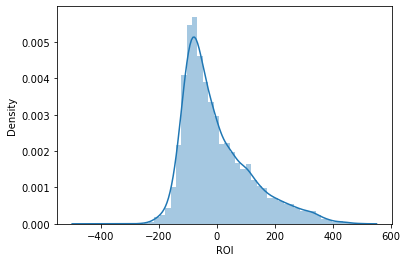

In [340]:
residuals = y_train - predictions
sns.distplot(residuals);

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


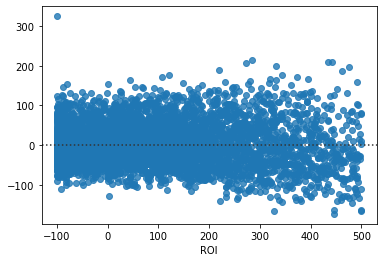

In [341]:
sns.residplot(y_train, predictions);

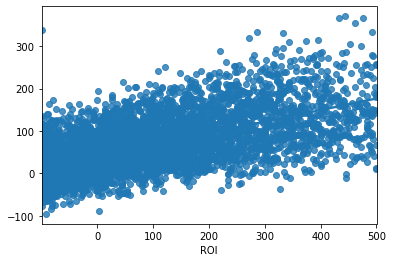

In [360]:
sns.regplot(x = y_train , y = predictions);

There are still signs of reduced homoscedasticity at the right side of the ROI residual plot, but in contrast to the model with ROI less than 1200, it is considerably dampened. 

<b>Feature Importance/ Coefficients</b>

In [343]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': elastic_model_grid.best_estimator_.coef_})

In [344]:
coefs['abs'] = abs(coefs.coef)

In [356]:
coefs.sort_values(by = 'abs' , ascending = False).head(30)

,Feature,coef,abs
22010,from_collection,92.050997,92.050997
25,GENRE_Biography,-33.160578,33.160578
13568,Director_Alfred Hitchcock,29.259639,29.259639
22016,day_Wednesday,26.875726,26.875726
290,ACTOR_Tom Cruise,25.618720,25.618720
28,genre_pair_unique,-25.300922,25.300922
229,ACTOR_Brad Pitt,23.878270,23.878270
18515,COMPOSER_James Horner,23.470250,23.470250
20,GENRE_Documentary,23.269103,23.269103
18456,BLURB_come,21.886866,21.886866


Again 'from_collection' is proving to be the best variable for predicting ROI.

In [346]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

,Feature,coef,abs
22010,from_collection,92.050997,92.050997
25,GENRE_Biography,-33.160578,33.160578
22016,day_Wednesday,26.875726,26.875726
28,genre_pair_unique,-25.300922,25.300922
20,GENRE_Documentary,23.269103,23.269103
18456,BLURB_come,21.886866,21.886866
22033,original_language_bins_No Language,20.353734,20.353734
10,GENRE_Family,19.631554,19.631554
18454,BLURB_couple,19.256188,19.256188
18431,BLURB_american,-18.755326,18.755326


In [347]:
#check percentage of variables that have become zero
coefs[coefs['abs'] == 0].shape[0]

6670

In [355]:
print(f'{round((6670/data.shape[1] * 100) , 2)} of the variables have been squeezed to zero by the 50% lasso elastic net model')

30.3 of the variables have been squeezed to zero by the 50% lasso elastic net model


<b> Intercept </b>

In [349]:
print(f'Without any of the variables, the average film in this sample is expected to have an ROI of approximately {round(elastic_model_grid.best_estimator_.intercept_,2)}')

Without any of the variables, the average film in this sample is expected to have an ROI of approximately 22.96


<h2> Bagging Regressor </h2>

By using an ensemble method, the overall R2 score can be increased and the feature coefficients can be averaged from all models to find thier overall value.

In [351]:
from sklearn.ensemble import BaggingRegressor

In [357]:
#elastic_model = ElasticNet()

bag_model = BaggingRegressor(base_estimator = elastic_model_grid.best_estimator_,
                            n_estimators = 100,
                            random_state = 1,
                            bootstrap = True )#with replacement of samples in the sampled observations



In [358]:
bag_model.fit(x_train_trans , y_train)

BaggingRegressor(base_estimator=ElasticNet(alpha=0.019306977288832496),
                 n_estimators=100, random_state=1)

<b>Resulting Scores</b>

In [359]:
print(f'Training Accuracy: {bag_model.score(x_train_trans , y_train)}')
print(f'Mean CV Score: {np.mean(cross_val_score(bag_model, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {bag_model.score(x_test_trans,y_test)}')

Training Accuracy: 0.35695464661649345
Mean CV Score: 0.15429912793031794
Testing Accuracy: 0.15035808505067794


A higher training accuracy but when a cross validation is performed, the accuracy more than halves which indicates this could be a one-time score. The cross validated score without the bagging regressor is still higher and has similar generalization.

<b> Mean Square Error </b>

In [361]:
#get the predictions for the training data
predictions = bag_model.predict(x_train_trans)

In [362]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions)

14426.65450574772

significantly reduced mean squared error than before reiterates the improvment of fit for the model.

In [363]:
#root mean square error
np.sqrt(mean_squared_error(y_train,predictions))

120.11100909470255

lower root mean square error than the previous model indicates that the performance is higher without bagging.

<b>Residual Plot</b>

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


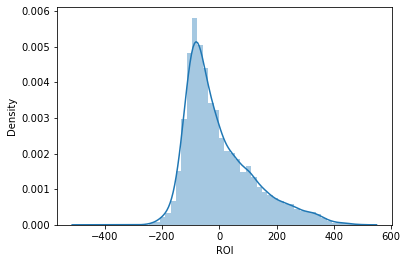

In [365]:
residuals = y_train - predictions
sns.distplot(residuals);

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


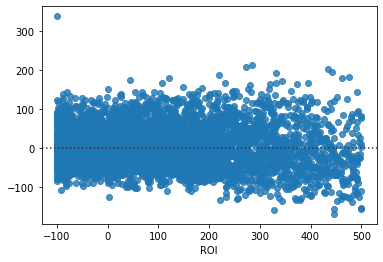

In [366]:
sns.residplot(y_train, predictions);

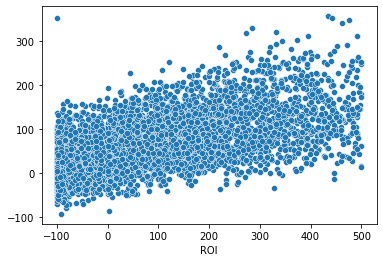

In [367]:
sns.scatterplot(x = y_train , y = predictions);

<b>Feature Importance/ Coefficients</b>

In [378]:
#find the mean value for each 
coef_ = np.mean([
    bagging.coef_ for bagging in bag_model.estimators_
], axis=0) 

In [379]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': coef_})

In [380]:
coefs['abs'] = abs(coefs.coef)

In [382]:
coefs.sort_values(by = 'abs' , ascending = False).head(30)

,Feature,coef,abs
22010,from_collection,90.871569,90.871569
25,GENRE_Biography,-31.046195,31.046195
13568,Director_Alfred Hitchcock,27.808585,27.808585
22016,day_Wednesday,25.613455,25.613455
28,genre_pair_unique,-25.178958,25.178958
20,GENRE_Documentary,22.866535,22.866535
290,ACTOR_Tom Cruise,21.895215,21.895215
18515,COMPOSER_James Horner,21.758689,21.758689
229,ACTOR_Brad Pitt,21.040228,21.040228
18456,BLURB_come,20.930848,20.930848


In [383]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

,Feature,coef,abs
22010,from_collection,90.871569,90.871569
25,GENRE_Biography,-31.046195,31.046195
22016,day_Wednesday,25.613455,25.613455
28,genre_pair_unique,-25.178958,25.178958
20,GENRE_Documentary,22.866535,22.866535
18456,BLURB_come,20.930848,20.930848
22033,original_language_bins_No Language,20.592906,20.592906
10,GENRE_Family,19.498845,19.498845
18454,BLURB_couple,18.572788,18.572788
6,GENRE_History,-18.436119,18.436119


In [384]:
#check percentage of variables that have become zero
coefs[coefs['abs'] == 0].shape[0]

1856

In [389]:
print(f"{round((coefs[coefs['abs'] == 0].shape[0]/data.shape[1] * 100) , 2)} of the variables have been squeezed to zero by the 50% lasso elastic net bagging model")

8.43 of the variables have been squeezed to zero by the 50% lasso elastic net bagging model


<b> Intercept </b>

In [393]:
print(f'Without any of the variables, the average film in this sample is expected to have an ROI of approximately {round(np.mean([bagger.intercept_ for bagger in bag_model.estimators_]),2)}')

Without any of the variables, the average film in this sample is expected to have an ROI of approximately 24.37


<h1> Y Variable Normal Distribution </h1>

Using the original dataset, can the scores be improved by changing the distribution?

Using np.log(ROI + 1) as the target to give the y variable a normal distribution could have several benefits:


<li>The distribution of the residuals for all of the models has so far been very positively skewed, bordering on exponential, for good linear regression models, the assumption is that the residuals must have a normal distribution </li>
<li>In every model there has been heteroscedasticity in the residual distribution, a normal distribution will be able to eliminate this </li>


However by using the log scale we lose model interpretability when reading the coefficients.

In [222]:
data.head()

,runtime,ROI,month,day,inf_budget,blurb_length,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,...,COMPOSER_Matt Novack,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne,original_language_bins,from_collection,blurb_objectivity,blurb_polarity
0,248.0,61.363636,6.0,Wednesday,3.781901e+08,37.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.903075,0.000992
1,67.0,-46.093333,11.0,Friday,4.359348e+05,56.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.898970,0.012065
2,171.0,-98.668687,11.0,Thursday,7.594529e+07,68.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.814066,-0.071299
3,95.0,55.044771,6.0,Saturday,1.773128e+08,52.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,1,0.925194,0.005663
4,101.0,-21.981352,9.0,Friday,4.572874e+07,14.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,English,0,0.836830,-0.043080


In [223]:
data.shape

(9537, 22015)

In [224]:
df = data.copy()

In [225]:
df.ROI.describe()

count    9537.000000
mean      159.062168
std       365.302249
min       -99.970951
25%       -62.743543
50%        34.478673
75%       223.540696
max      2508.150985
Name: ROI, dtype: float64

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


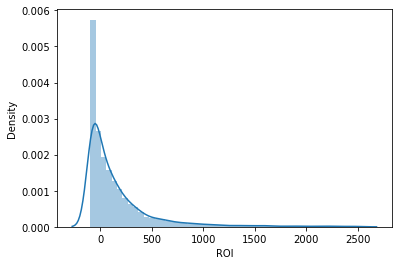

In [226]:
sns.distplot(df.ROI);

In [227]:
from scipy import stats
stats.normaltest(df.ROI)

NormaltestResult(statistic=5988.596827789553, pvalue=0.0)

<b> Using boxcox to transform the variable into normal distribution </b>

In [228]:
from scipy.stats import boxcox ,yeojohnson
from scipy.special import inv_boxcox

since log can only be defined for numbers greater than zero, we need to add 100 to all the values of ROI and then take the logarithm. 

In [229]:
stats.normaltest(boxcox((df.ROI+100))[0])

NormaltestResult(statistic=62.0226045251388, pvalue=3.4037883752558917e-14)

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


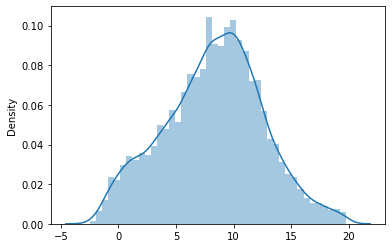

In [230]:
sns.distplot(boxcox((df.ROI+100))[0]);

<b> Using yeojohson to transform the variable into normal distribution</b>

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


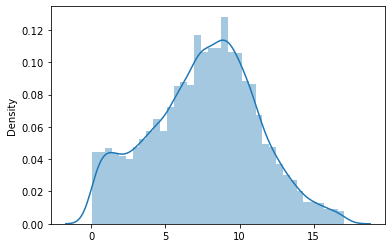

In [231]:
sns.distplot(yeojohnson(df.ROI+100)[0]);

In [232]:
stats.normaltest(yeojohnson((df.ROI+100))[0])

NormaltestResult(statistic=139.94229218249626, pvalue=4.091827908330435e-31)

<b> Just using the log function to transform </b>

In [233]:
np.log(df.ROI + 100)

0       5.083660
1       3.987254
2       0.286166
3       5.043714
4       4.356948
          ...   
9532    4.500185
9533    4.647730
9534    4.252188
9535    4.409614
9536    1.359093
Name: ROI, Length: 9537, dtype: float64

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


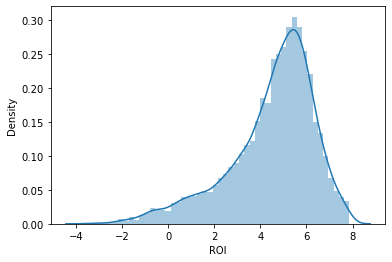

In [234]:
sns.distplot(np.log(df.ROI + 100));

In [235]:
from scipy import stats
stats.normaltest(np.log(df.ROI + 100))

NormaltestResult(statistic=1385.2274301303162, pvalue=1.5910559671044574e-301)

Clearly not a normal distribution but the y target has been made more normal, shown by the slight increase in p value. The distribution can be considered normal when the pvalue is greater than 0.05 (less than 95% confidence that the distribution isn't normal)

The best method of normality is the boxcox method, giving the distribution with the highest probability of normality.

In [236]:
y = df.pop('ROI')

In [237]:
y_norm = boxcox(y +100)[0]
lambda_value = boxcox(y +100)[1]

to get back to the original value for the distribution you need the inverse boxcox with the lambda of the y variable distribution

In [238]:
#lambda_value = boxcox(df.ROI +100)[1]
# y_original = inv_boxcox(coefficient , lambda_value) -100

In [239]:
X = df

In [240]:
X.shape

(9537, 22014)

<b> Baseline for the target variables </b>

In [241]:
y_norm.mean()

8.24500225336546

<h1>Preprocessing</h1>

<b> dummies for day, month , original_language_bins </b>

In [242]:
X = pd.get_dummies(X, columns = ['day', 'month', 'original_language_bins'], dummy_na = True, drop_first = True)

In [243]:
X.shape

(9537, 22037)

In [246]:
X

,runtime,inf_budget,blurb_length,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,GENRE_Family,GENRE_Adventure,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,248.0,3.781901e+08,37.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,67.0,4.359348e+05,56.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,171.0,7.594529e+07,68.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,95.0,1.773128e+08,52.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,101.0,4.572874e+07,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,100.0,3.355315e+06,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
9533,79.0,2.122089e+04,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9534,112.0,1.134448e+07,21.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
9535,116.0,1.222776e+07,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<b>Train test split</b>

In [247]:
x_train, x_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.2, random_state = 1)

In [248]:
x_train = pd.DataFrame(x_train ,columns = X.columns)
x_test = pd.DataFrame(x_test ,columns = X.columns)

<b>Standard Scaler on the Variables that are not binary/catagorical</b>

I'm just going to scale the continuous features to be able to retain explainability of the binary variables

In [249]:
scaler = StandardScaler()
scaler_columns = ['runtime', 'inf_budget', 'blurb_length','blurb_objectivity', 'blurb_polarity']

In [250]:
scale_transformer = ColumnTransformer([('scaler',scaler,scaler_columns)], remainder = 'passthrough', sparse_threshold = 0)

transform the x variables

In [253]:
x_train_trans = pd.DataFrame(scale_transformer.fit_transform(x_train), columns = get_feature_names(scale_transformer))

x_test_trans = pd.DataFrame(scale_transformer.transform(x_test), columns = get_feature_names(scale_transformer))

<ipython-input-252-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-252-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [254]:
x_train_trans

,scaler__runtime,scaler__inf_budget,scaler__blurb_length,scaler__blurb_objectivity,scaler__blurb_polarity,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,0.499954,-0.239884,0.468320,0.084534,-0.152816,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.552794,-0.462344,-1.095240,0.798717,1.564589,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.193505,-0.692674,-1.247783,1.747339,0.354826,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.323935,1.021075,-0.752020,0.407741,-1.054686,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.552794,-0.614906,-0.790155,0.640046,1.149833,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7624,1.232301,0.220783,0.086964,0.598133,0.226360,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7625,1.049214,-0.364411,-0.637613,0.336727,0.259203,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7626,0.591498,-0.540125,1.955608,0.322993,0.284676,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7627,2.971623,-0.433999,-0.828291,0.545867,-1.263210,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<h3>Elastic Net CV to find the optimal Value for C (regularisation strength increases with reduced C) and L1 ratio </h3>

In [255]:
#model object
elastic_model = ElasticNet()

In [256]:
#investigate parameters
elastic_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [257]:
#confirm the parameters to iterate through
elastic_model_params = {'alpha': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15)}


#create the grid search cv object
elastic_model_grid = GridSearchCV(elastic_model, elastic_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
elastic_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46018.97690659698, tolerance: 14.144053774949478
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=3,
             param_grid={'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             verbose=1)

<b>Resulting Scores</b>

In [258]:
#the best estimator
elastic_model_grid.best_estimator_

ElasticNet(alpha=0.005179474679231213, l1_ratio=0.0)

In [259]:
elastic_model_grid.best_estimator_.l1_ratio

0.0

Completely ridge model

In [260]:
#training score cross validated
elastic_model_grid.best_score_

0.17592669965910088

In [261]:
#test score
test = elastic_model_grid.score(x_test_trans,y_test)

In [262]:


print(f'Training Accuracy: {elastic_model_grid.best_score_}')
print(f'Mean CV Score: {np.mean(cross_val_score(elastic_model_grid.best_estimator_, x_train_trans, y_train, cv = 5))}')
print(f'Testing Accuracy: {test}')

Training Accuracy: 0.17592669965910088


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34823.207394063014, tolerance: 11.184105346717812
  model = cd_fast.enet_coordinate_descent(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35217.07977875743, tolerance: 11.263412619505296
  model = cd_fast.enet_coordinate_descent(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35309.80481645522, tolerance: 11.35208413661321
  model = cd_fast.enet_coordinate_descent(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages

Mean CV Score: 0.17592669965910088
Testing Accuracy: 0.19258996400469697


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35259.954731666585, tolerance: 11.410871485228785
  model = cd_fast.enet_coordinate_descent(


<b> Mean Square Error </b>

In [265]:
#get the predictions for the training data
predictions = elastic_model_grid.best_estimator_.predict(x_train_trans)

In [277]:
real_train = inv_boxcox(y_train, lambda_value)-100

In [278]:
real_pred = inv_boxcox(predictions, lambda_value)-100

In [279]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real_train,real_pred)

106811.81453057531

In [280]:
#root mean square error
np.sqrt(mean_squared_error(real_train,real_pred))

326.82076820571746

<b>Residual Plots for inversed boxcoxed y variable</b>

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


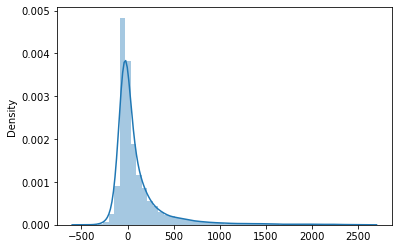

In [281]:
residuals = real_train - real_pred
sns.distplot(residuals);

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


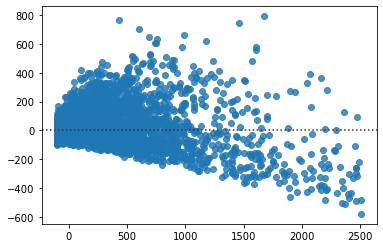

In [282]:
sns.residplot(real_train, real_pred);

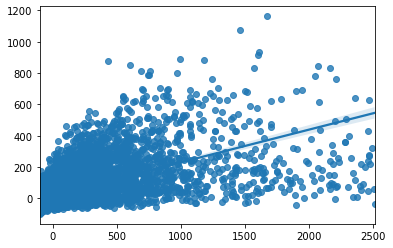

In [283]:
sns.regplot(x = real_train , y = real_pred);

Although below you will see the boxcox causes normal distribution of residuals and evenly spread error, the actual values (ROI), above, indicate that the errors have less homoscedasticity than before, increasing the rmse.

<b> Residual Plots for Boxcoxed y variable </b>

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


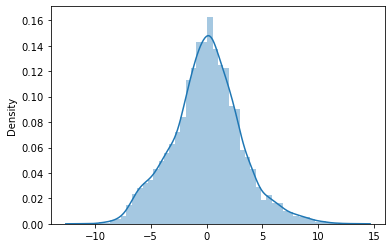

In [284]:
residuals = y_train - predictions
sns.distplot(residuals);

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


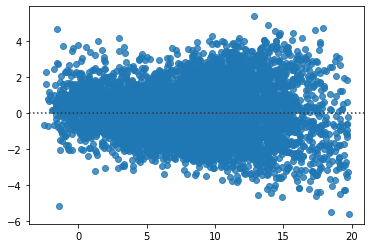

In [285]:
sns.residplot(y_train, predictions);

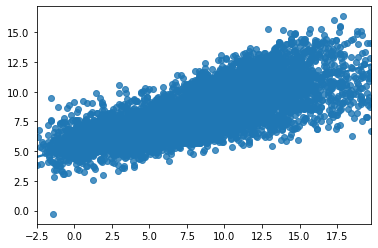

In [286]:
sns.regplot(x = y_train , y = predictions);

In [292]:
from scipy.stats.stats import pearsonr

pearsonr(y_train,predictions)

(0.7387180583030019, 0.0)

Using the boxcox data reduces heteroscedasticity, but it is still evident in the residual plot (middle) as the errors become further away from the 0 line as the boxcoxed ROI increases.

<b>Feature Importance/ Coefficients</b>

In [293]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': elastic_model_grid.best_estimator_.coef_})

In [294]:
coefs['abs'] = abs(coefs.coef)

Create a column that represents the ROI change for that film, given the variable.

In [304]:
coefs['ROI_effect'] = coefs.coef.apply(lambda x: (inv_boxcox(x , lambda_value)-100))

In [305]:
coefs.sort_values(by = 'ROI_effect' , ascending = False).head(30)

,Feature,coef,abs,ROI_effect
22010,from_collection,2.796003,2.796003,-90.919986
18494,COMPOSER_John Williams,1.081107,1.081107,-97.347180
5447,ACTOR_Clint Eastwood,1.004515,1.004515,-97.509142
1758,ACTOR_Tom Hanks,0.992057,0.992057,-97.534727
290,ACTOR_Tom Cruise,0.972447,0.972447,-97.574577
18465,COMPOSER_Thomas Newman,0.955805,0.955805,-97.607994
11435,ACTOR_Steve James,0.952059,0.952059,-97.615466
22033,original_language_bins_No Language,0.937119,0.937119,-97.645079
18497,COMPOSER_Bill Conti,0.813209,0.813209,-97.879619
3327,ACTOR_Sally Field,0.791684,0.791684,-97.918400


The ROI_effects have shown that every variable will have a negative effect on ROI which is unexpected, however, what is evident is from_collection having the least negaive effect on the ROI which is consistent with the other models.

In [309]:
coefs.sort_values(by = 'abs' , ascending = False)[(coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('ACTOR') == False)
                                                 & (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('Director') == False) &
                                                 (coefs.sort_values(by = 'abs' , ascending = False).Feature.str.contains('COMPOSER') == False)].head(50)

,Feature,coef,abs,ROI_effect
22010,from_collection,2.796003,2.796003,-90.919986
25,GENRE_Biography,-1.043622,1.043622,-99.691413
28,genre_pair_unique,-0.958241,0.958241,-99.656324
22033,original_language_bins_No Language,0.937119,0.937119,-97.645079
22030,original_language_bins_French,-0.871407,0.871407,-99.617465
18369,BLURB_set,-0.693491,0.693491,-99.526973
18409,BLURB_school,0.669571,0.669571,-98.127902
20,GENRE_Documentary,0.647972,0.647972,-98.163149
18419,BLURB_old,-0.632438,0.632438,-99.492287
19,GENRE_Horror,0.624951,0.624951,-98.200137


In [308]:
#check percentage of variables that have become zero
coefs[coefs['abs'] == 0].shape[0]

1261

In [307]:
print(f'{round((1261/data.shape[1] * 100) , 2)} of the variables have been squeezed to zero by the 0% lasso elastic net model')

5.73 of the variables have been squeezed to zero by the 0% lasso elastic net model


<b> Intercept </b>

In [306]:
print(f'Without any of the variables, the average film in this sample is expected to have an ROI of approximately {round((inv_boxcox(elastic_model_grid.best_estimator_.intercept_, lambda_value)-100),2)}')

Without any of the variables, the average film in this sample is expected to have an ROI of approximately -27.45


Although the model has improved in r2 score accuracy, by using boxcox we lose interpretability in the model. If we were making a model to productionise, we would favour the model with ROI values < 500 over this model.

<h1> Visualisation </h1>

In [329]:
scores = [-0.7497,-1.2237 , 0.1111,0.1356, 0.0562,0.0961, 0.04124,0.0475, 0.0896,0.1141, 0.01100,0.1354]
train_scores = scores[0::2]
test_scores = [-1.2237 , 0.1356, 0.0961, 0.0475, 0.1141, 0.1354]

regression_scores = pd.DataFrame({'train_scores': train_scores, 
                                 'test_scores': test_scores}, index = ['Simple Linear Regression', 
                                                                      'Elastic Net Linear Regression',
                                                                      'Decision Tree Regressor',
                                                                      'Support Vector Machine (Linear Kernel)',
                                                                      'Lasso Linear Regression',
                                                                      'Ridge Regression'])

In [330]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [331]:
regression_scores

,train_scores,test_scores
Simple Linear Regression,-0.74970,-1.2237
Elastic Net Linear Regression,0.11110,0.1356
Decision Tree Regressor,0.05620,0.0961
Support Vector Machine (Linear Kernel),0.04124,0.0475
Lasso Linear Regression,0.08960,0.1141
Ridge Regression,0.01100,0.1354


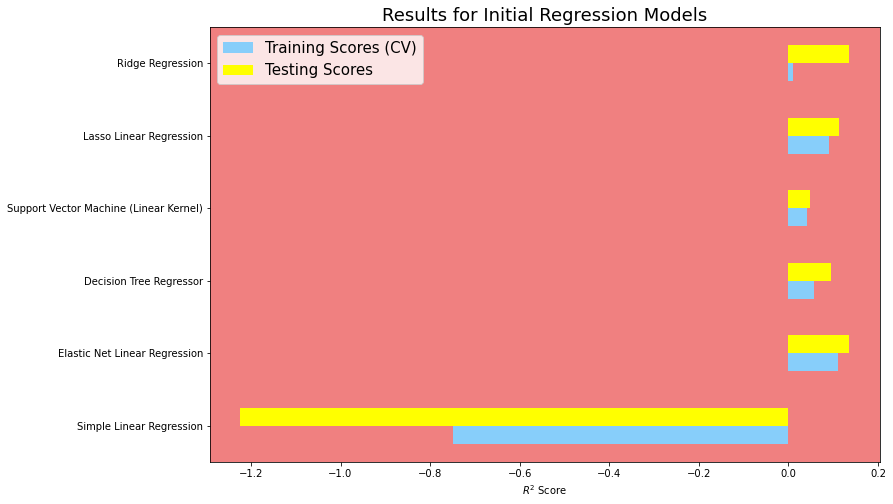

In [343]:
ax = regression_scores.plot(kind = 'barh', color = ['lightskyblue', 'yellow'], figsize = (12,8)).set_facecolor('lightcoral')
plt.legend(['Training Scores (CV)', 'Testing Scores'], prop = {'size':15});
plt.xlabel('$R^{2}$ Score');
plt.title('Results for Initial Regression Models', fontsize = 18)
plt.savefig('regression_models_original.jpeg', format = 'jpeg')

In [334]:
preprocessing_change_results = pd.DataFrame({'test_scores': [0.1356 , 0.1343, 0.1445, 0.1516, 0.1925, 0.1275,0.1503],
                                            'train_scores': [0.1111 , 0.10846 , 0.1544, 0.1545, 0.1759, 0.1211, 0.1542]}, 
                                            index = ['No change to Dataset', 'PCA (3262 components)', 'Removal of Outliers',
                                                    'ROI < 500', 'ROI Boxcox Normal Distribution', 'Polyomial Features on Outlier Data', 'Bagging Regressor'])

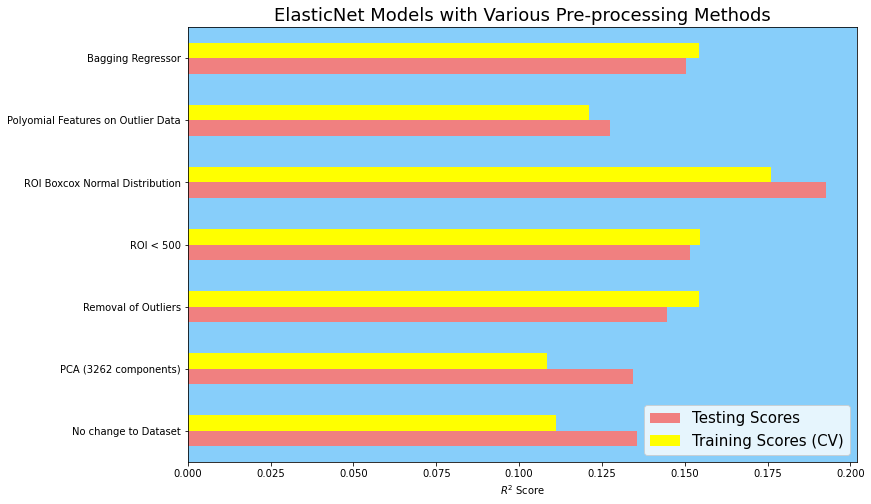

In [342]:
ax = preprocessing_change_results.plot(kind = 'barh', color = ['lightcoral', 'yellow'], figsize = (12,8)).set_facecolor('lightskyblue')
plt.legend(['Testing Scores','Training Scores (CV)'], prop = {'size':15});
plt.title('ElasticNet Models with Various Pre-processing Methods', fontsize = 18)
plt.xlabel('$R^{2}$ Score');
plt.savefig('ElasticNet_Models_with_Various_Preprocessing_Methods.jpeg', format = 'jpeg')




In [339]:
preprocessing_change_rmse_results = pd.DataFrame({'rmse_scores': [301.46, 317.36, 183.25, 118.50,326.82,191.25, 120.11]}, 
                                            index = ['No change to Dataset', 'PCA (3262 components)', 'Removal of Outliers',
                                                    'ROI < 500', 'ROI Boxcox Normal Distribution', 'Polyomial Features on Outlier Data','Bagging Regressor'])


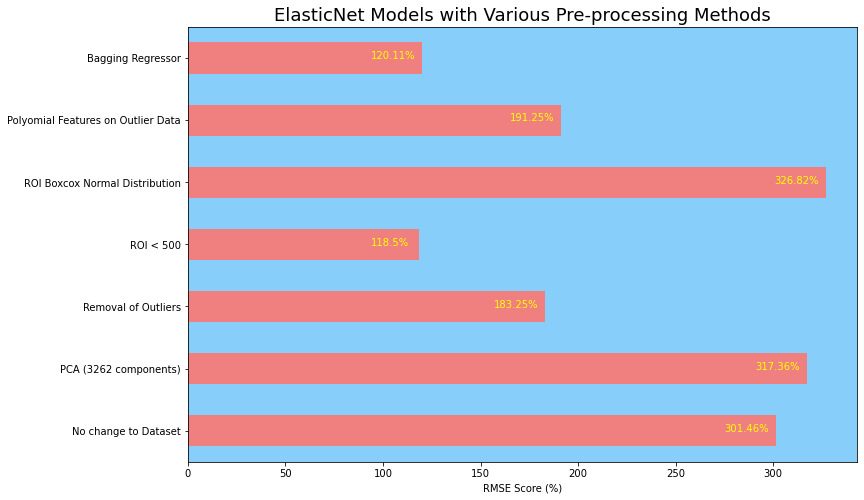

In [344]:
ax = preprocessing_change_rmse_results.plot(kind = 'barh', color = 'lightcoral', figsize = (12,8), legend = None);
ax.set_facecolor('lightskyblue');
plt.title('ElasticNet Models with Various Pre-processing Methods', fontsize = 18);
plt.xlabel('RMSE Score (%)');



rects = ax.patches

# Make some labels.
labels = [f"{i}%" for i in preprocessing_change_rmse_results.rmse_scores]

for rect, label in zip(rects, labels):
    height = rect.get_width()
    ax.text(rect.get_width()-15, rect.get_y()+0.2,label,
            ha='center', va='bottom', color = 'yellow');
    

plt.savefig('ElasticNet_Models_with_Various_Preprocessing_Methods_rmse.jpeg', format = 'jpeg')

In [264]:
# [rect.get_width() for rect in rects]

In [263]:
# [rect.get_y() for rect in rects]

<h1> Conclusion </h1>

This project had the aim of being able to see which pre-release features impacted ROI. We have discovered one particular feature which I can confidently say has a positive affect on the ROI outcome, 'from_collection'. In every model that had good generalisation, 'from_collection' was the variable with the highest coefficient or importance which shows that, although our models explained only 15% of the variability of ROI, the vast majority of that variance can be explained by this feature. Other notable features include the composer John Williams and actors Clint Eastwood, Bernard Lee and Lois Maxwell. The inclusion of the latter two features highlight that films in collections will genrate high profits.

Why may films in collections create high profits?

1) If the first film is a hit, people will tend to watch the second out of hype and anticipation.

2) People tend to stick to what they love in terms of genre or simply the collection itself. For example, if you're a big marvel fan, you're bound to go to the cinema and watch a marvel film, even if the superhero isnt to your liking, or you dont think the film will be as good as a previous film.

3) Films in collections gain the attraction of the best actors/directors.


Overall, the models explain the current trend in cinema, which appears to include an incremental amount of remakes and sequels. Star Wars, Avengers and Toy Story in recent years to name a few.

<b> Improvements </b>

1) tmdb data, although quick to scrape, is built on film lovers inputting the movies' infomation into the website, so its credibility where less recognised films are concerned is reduced. For example, An overwhelming amount of films in the dataset were english speaking compared to other nations such as russian or japanese and just becuase these films are less recognised doesnt necessarily mean that thier return on investment will be impacted. 

2) Though interesting to see the specific actors/directors that have been in the films, the variables can be feature engineered to gain a popularity score for that particular actor in that point in time. That way, we can still use data which may be considered old and outdated, such as actors who have retired or passed away. Furthermore, this method could pick up on trends such as more women appearing as a leading role in films. This will ensure a model such as this can be more productionable. 

3) Additional feature - from_bestselling_book? - If the story was based off a bestselling book, would that increase the chances of higher ROI?

4) Using statsmodels to be able to see the significance of the features in the model
